# Import liabraires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
Features

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit -- profit of each state in the past few years

In [3]:
# read the data
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Step 2. EDA

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.duplicated().sum()

0

# While checking the data set we can easly find out the state columns is not required to predicate the profit values. Hence, I have drop the columns

In [8]:
data = df.drop("State", axis = 1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Renaming the columns name to make it short

In [9]:
data.rename(columns={"R&D Spend": "RnD", "Administration": "admin", "Marketing Spend": "market", "Profit": "profit"}, inplace=True)

In [10]:
data.head()

,RnD,admin,market,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Checking outlier

<Axes: >

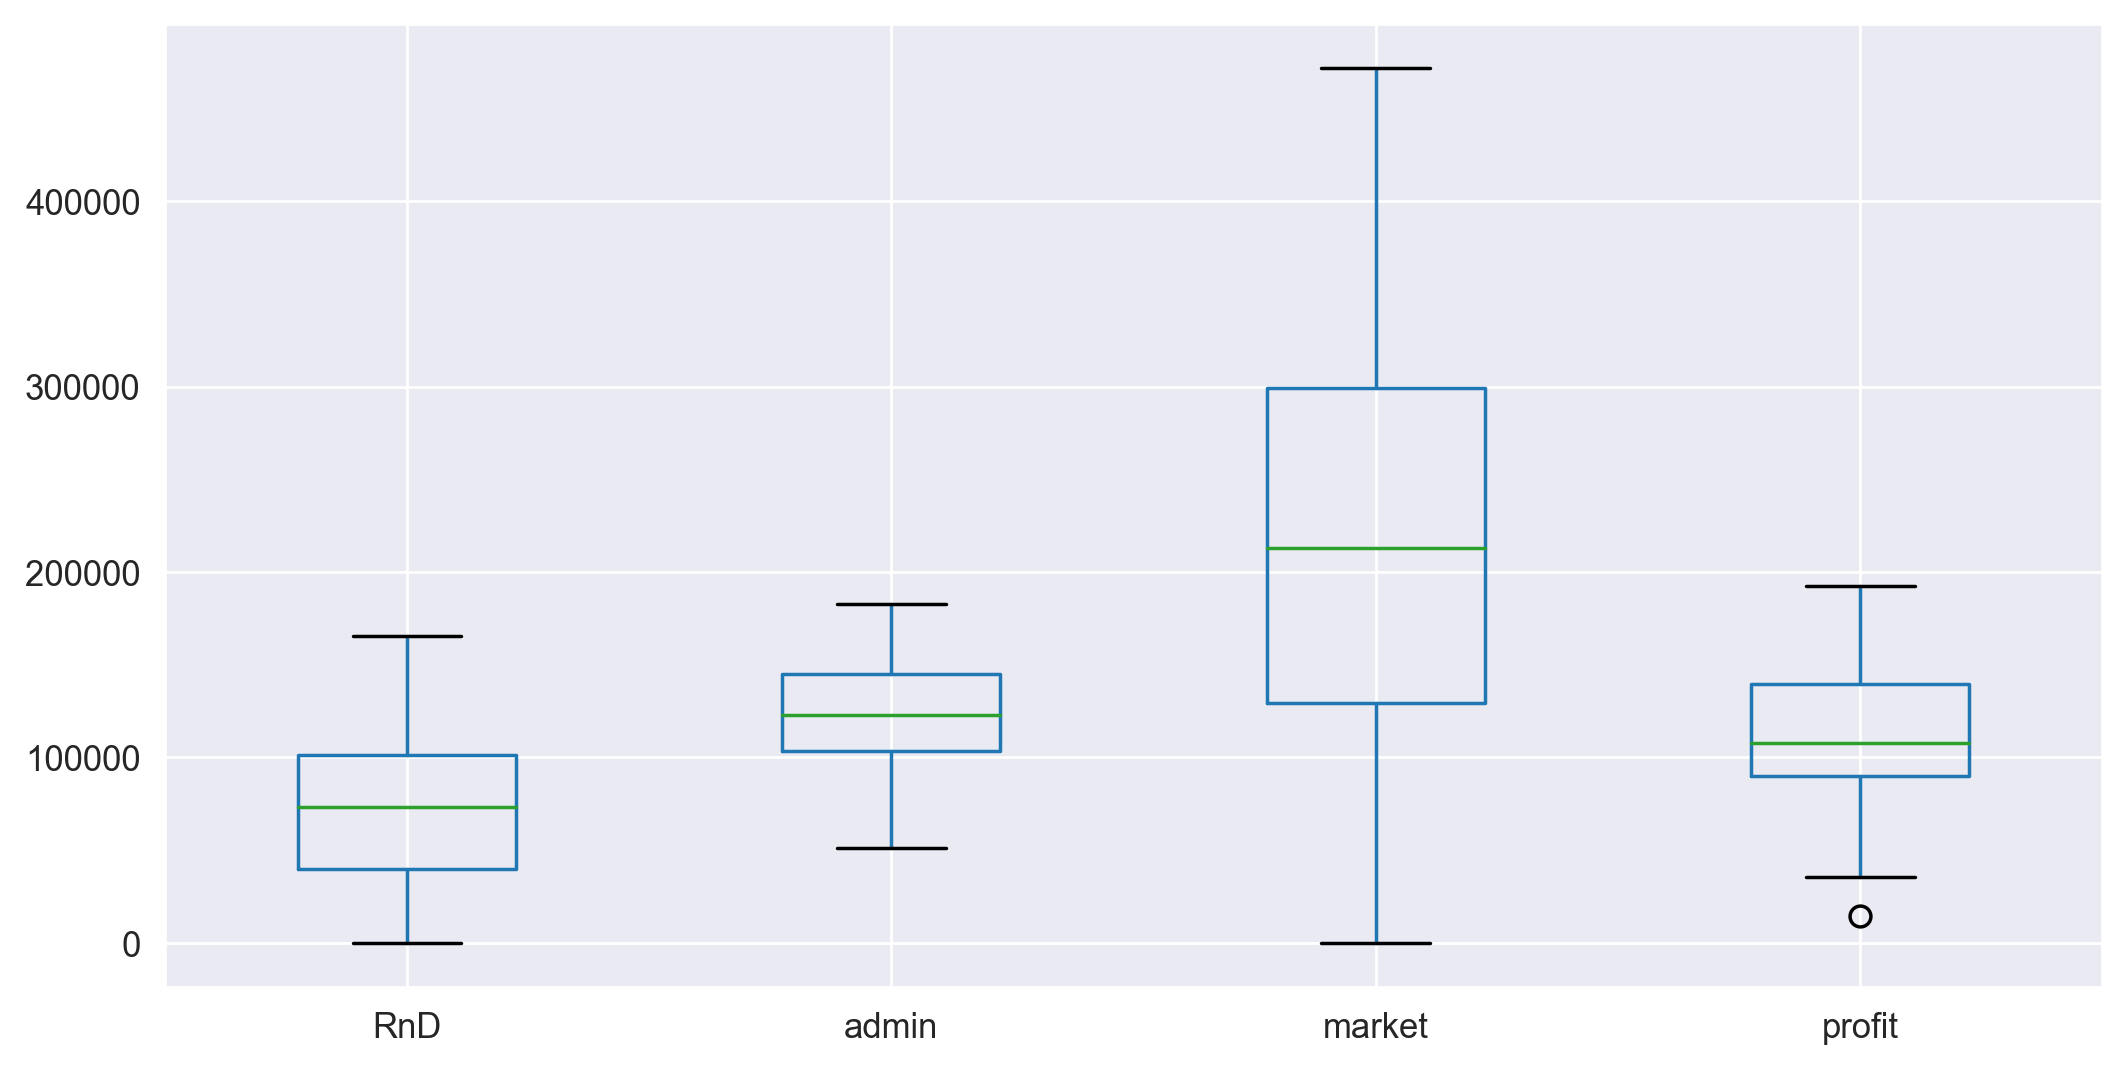

In [11]:
data.boxplot()

# While looking at the above boxplot, we can see that the profit columns contain outliers. As a result, we can deal with the outlier prior to establishing the model.

<Axes: xlabel='profit'>

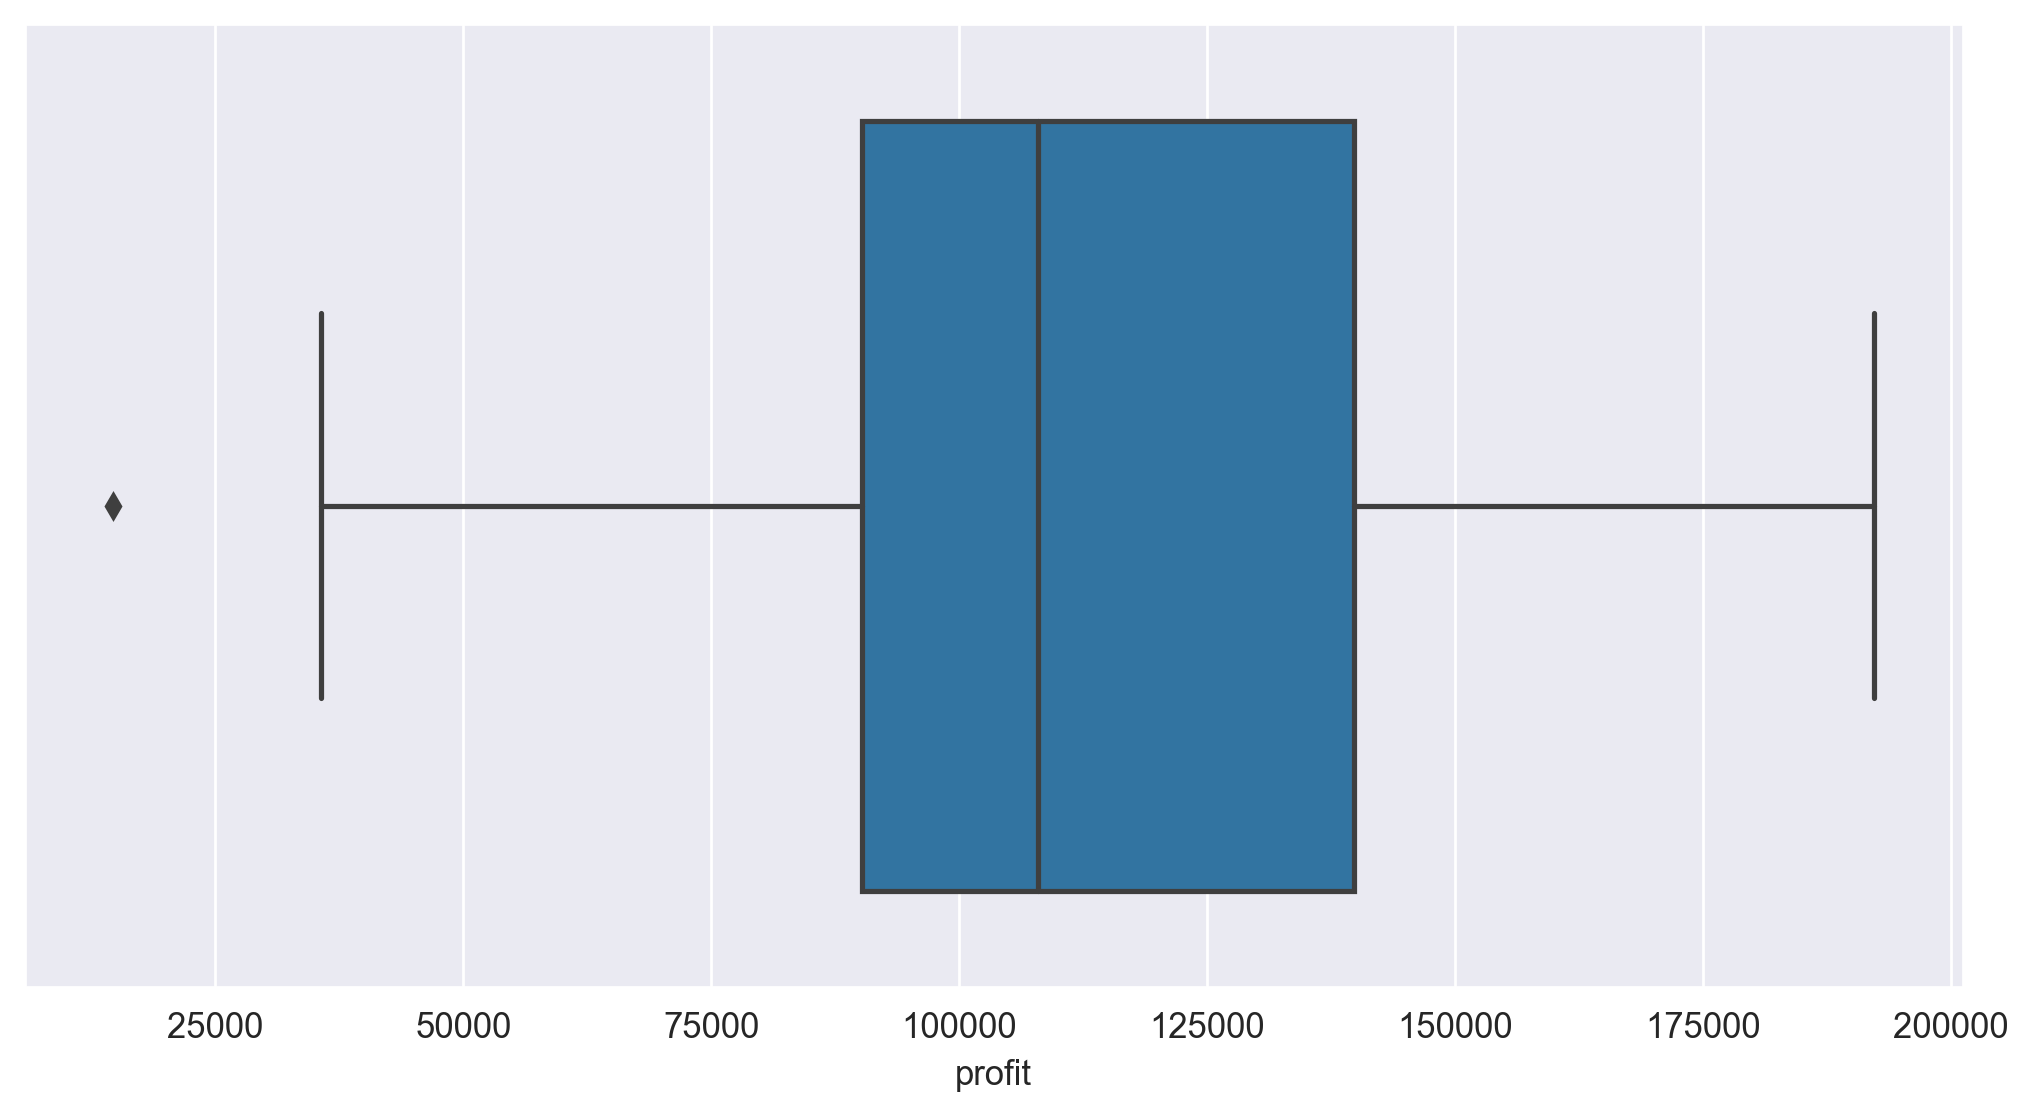

In [12]:
sns.boxplot(x = data['profit'])

# Outlier detection function

In [13]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [14]:
outlier_detection(data, 'profit')

(15698.290000000023, 214206.58999999997)

In [15]:
data[data["profit"]<15698.29]

,RnD,admin,market,profit
49,0.0,116983.8,45173.06,14681.4


In [16]:
len(data[data["profit"]<15698.29])

1

In [17]:
data.loc[data["profit"]<15698.29, "profit"]

49    14681.4
Name: profit, dtype: float64

# Capping Outliers

In [18]:
data.loc[data["profit"]<15698.29, "profit"] = 15698.29

<Axes: xlabel='profit'>

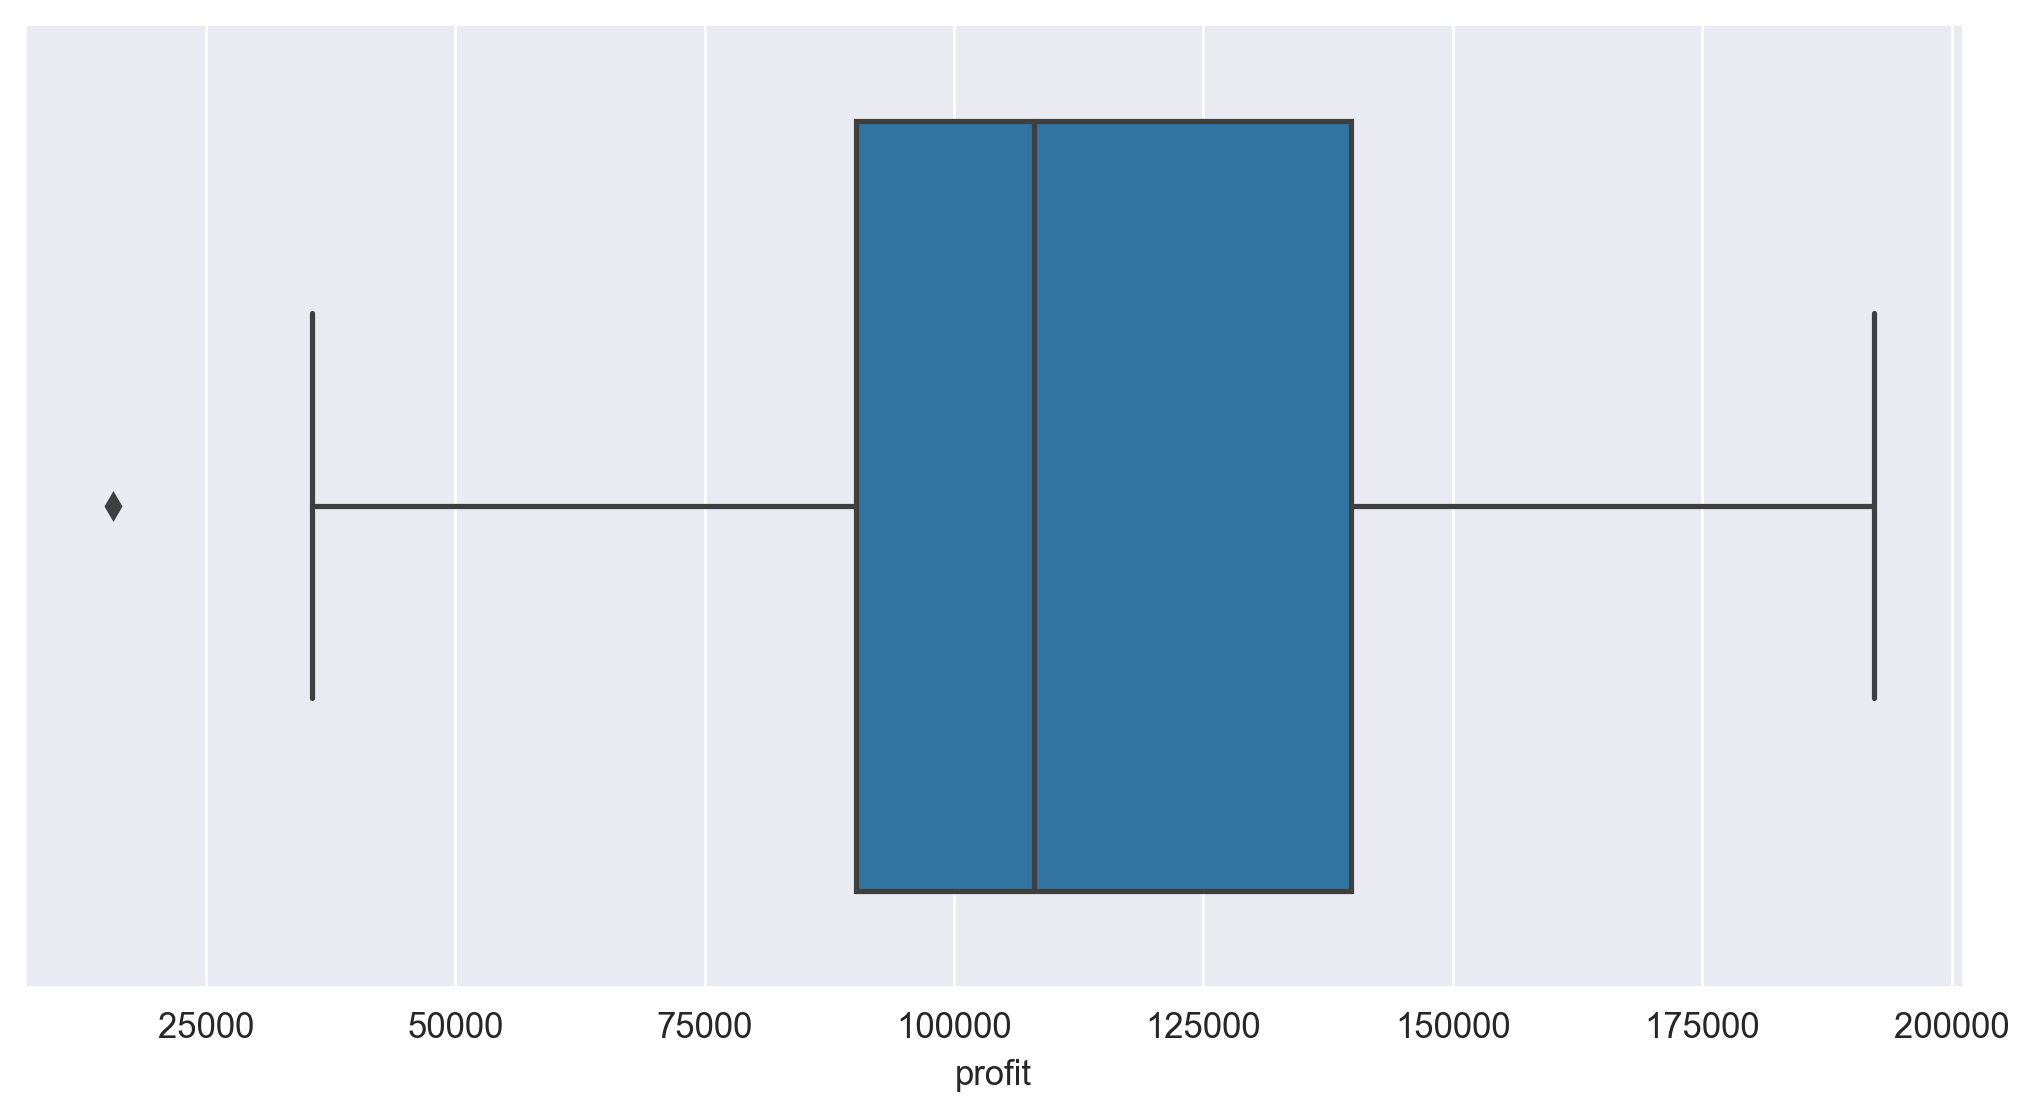

In [19]:
sns.boxplot(x=data["profit"])

# See after appyling the lower quentile value still the box plot showing the outlier. Hence, we can try to replace with median.

In [20]:
data["profit"].median()

107978.19

In [21]:
#Outlier Replaced with Median
data.iloc[49, data.columns.get_loc("profit")] = 107978.19

<Axes: xlabel='profit'>

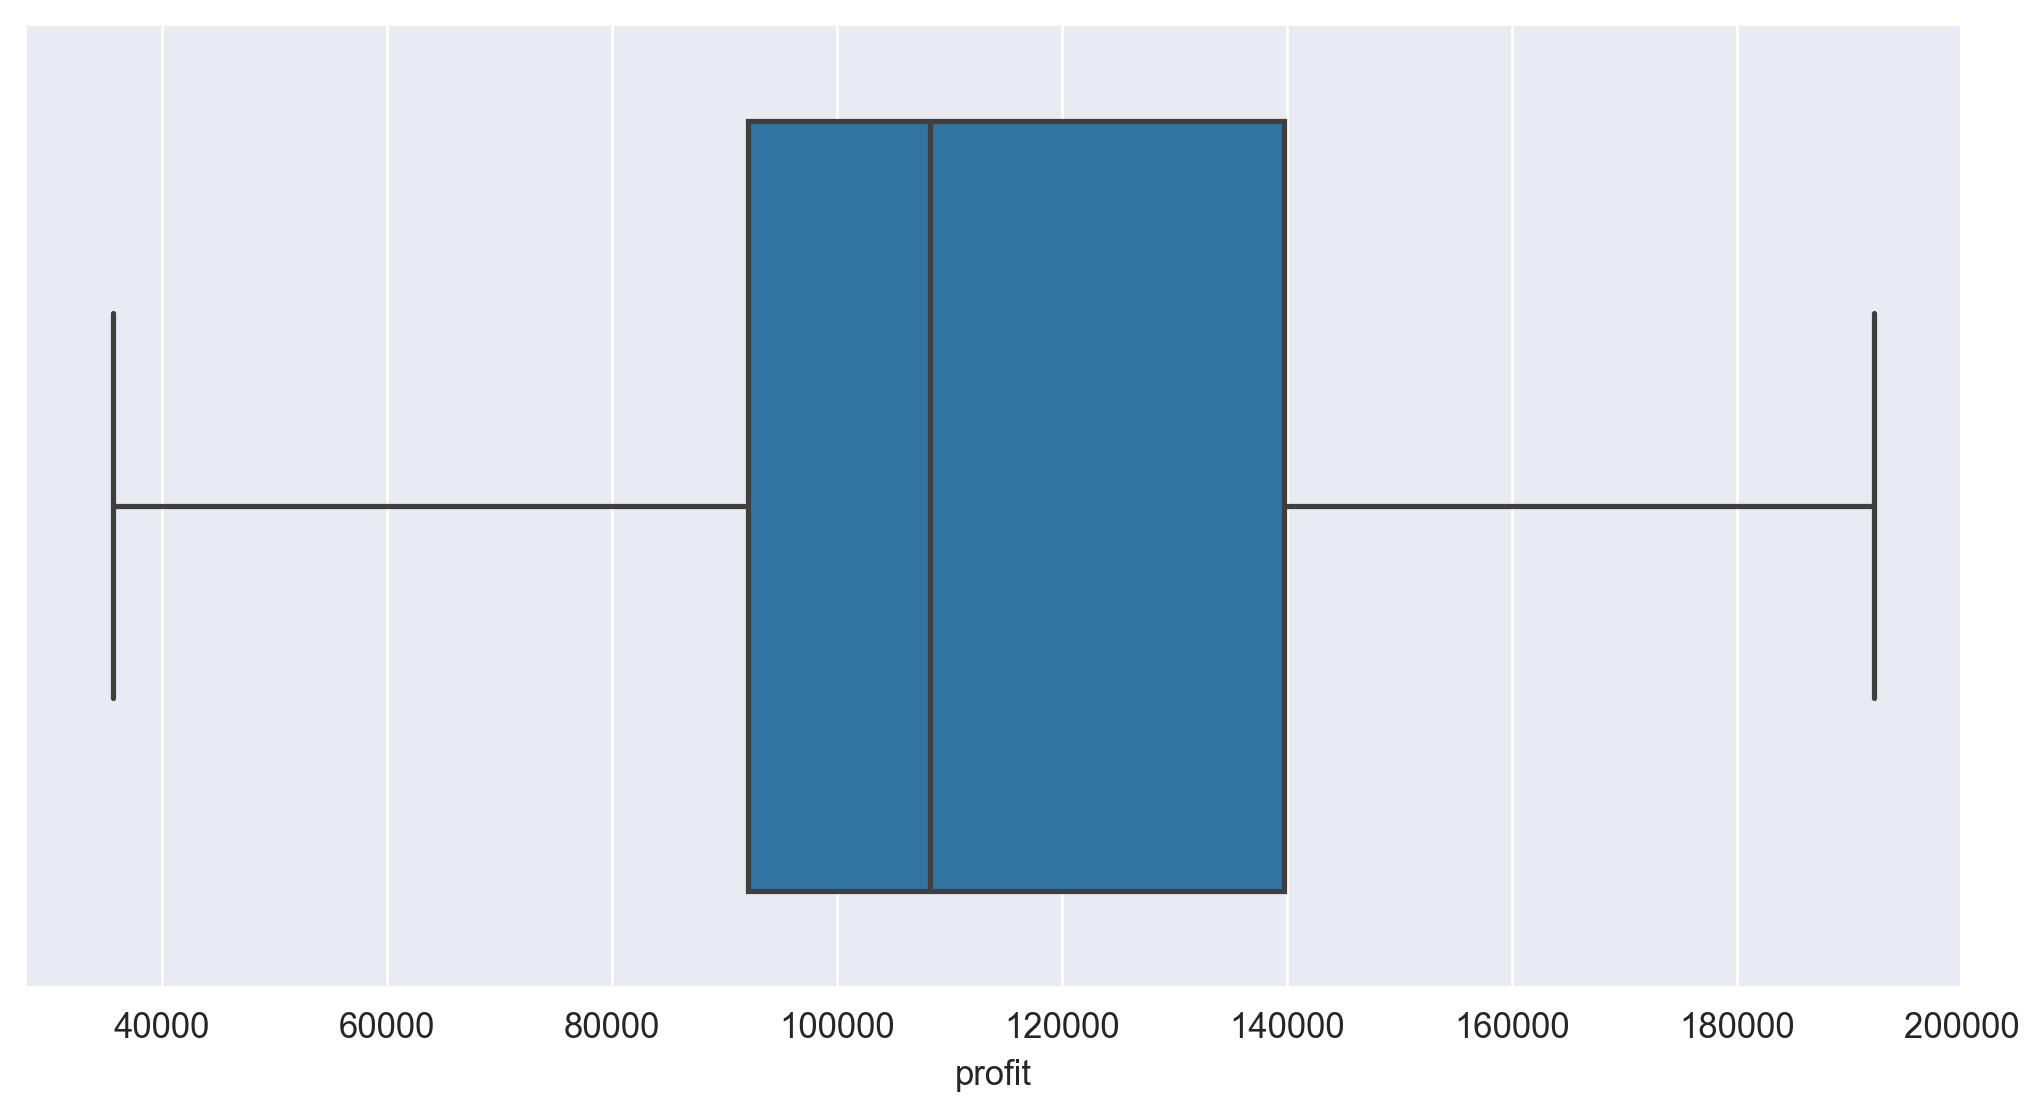

In [22]:
sns.boxplot(x=data["profit"])

# see the above boxplot after replacing the outiler with median, the boxplot show there is no outlier in the boxplot. thats good sign

# Data visualization

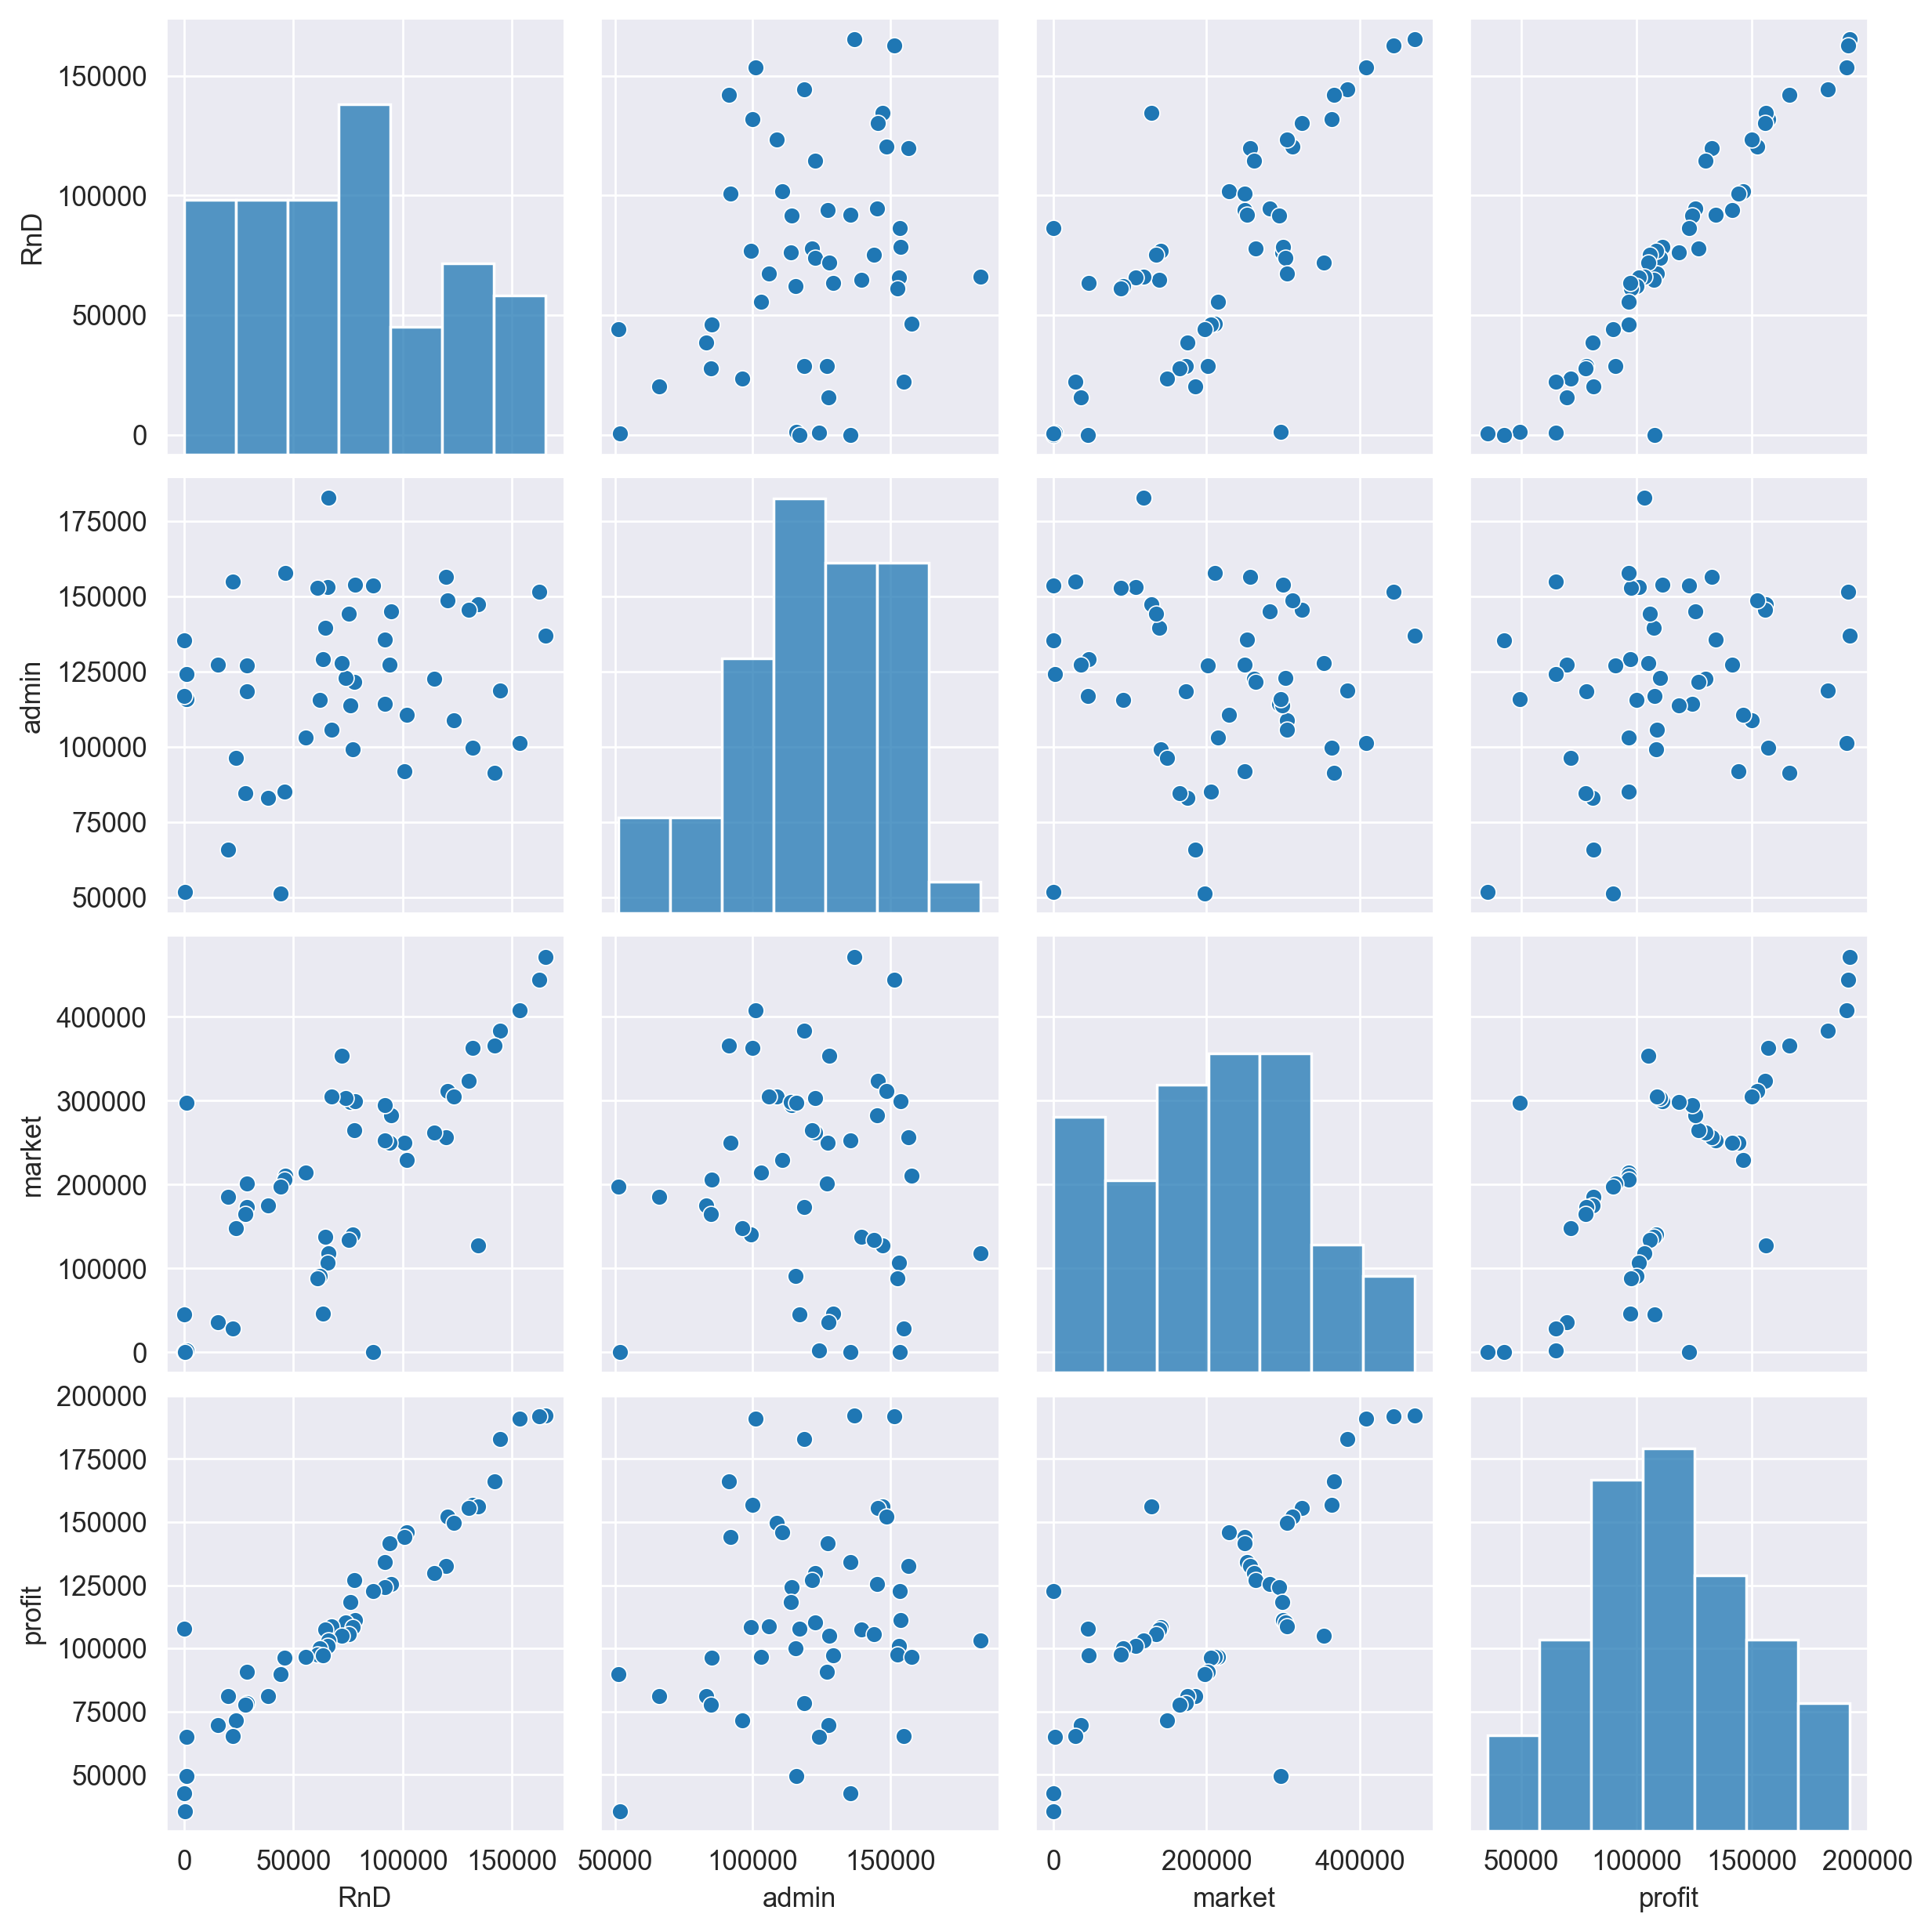

In [66]:
sns.pairplot(data)

# Correlation

In [67]:
data.corr()

,RnD,admin,market,profit
RnD,1.000000,0.241955,0.724248,0.956777
admin,0.241955,1.000000,-0.032154,0.206243
market,0.724248,-0.032154,1.000000,0.729236
profit,0.956777,0.206243,0.729236,1.000000


<Axes: >

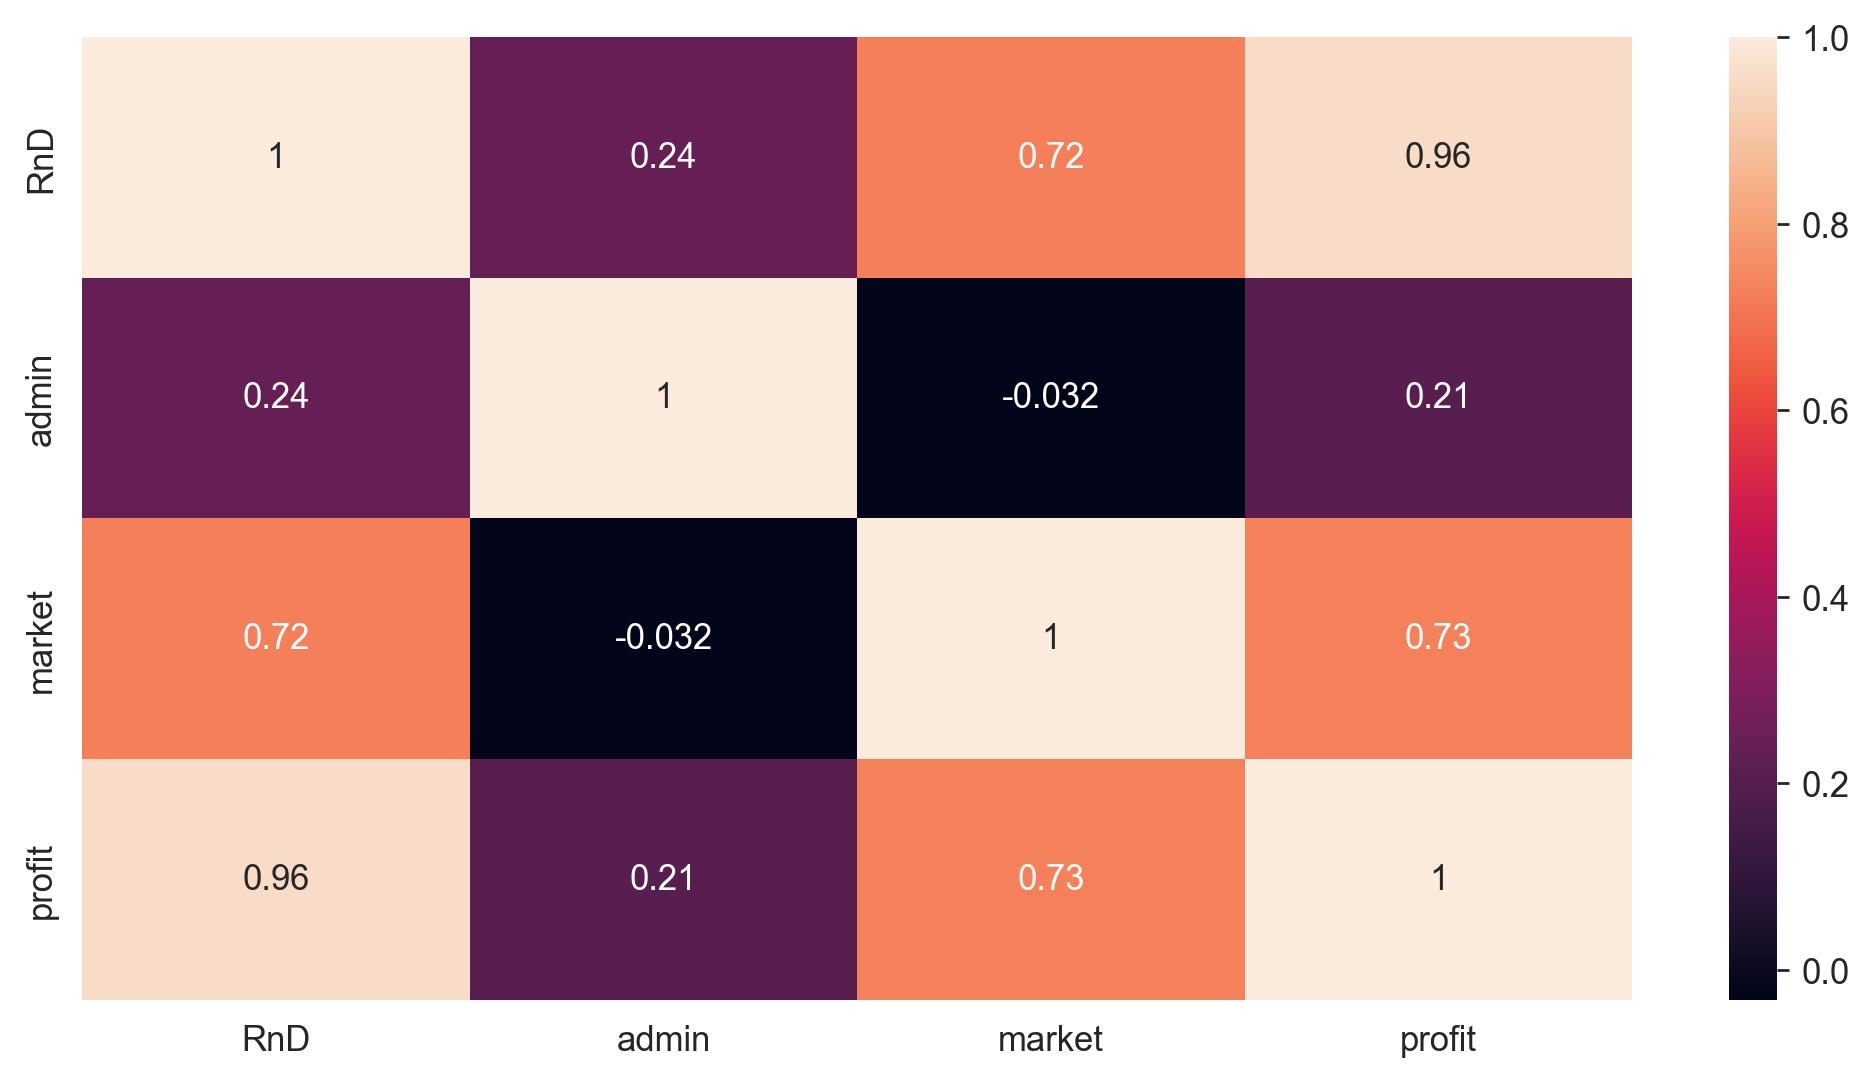

In [69]:
sns.heatmap(data.corr(), annot=True)

# Model Building

In [70]:
import statsmodels.formula.api as smf

In [72]:
model = smf.ols("profit~RnD+admin+market", data=data).fit()

In [73]:
model.pvalues

Intercept    7.703245e-09
RnD          7.419553e-18
admin        8.095370e-01
market       2.718359e-01
dtype: float64

# Here while condecting the hypothesis test

- H0 = 0 Reject Null Hypothesis (Columns are not importans)
- Ha not equal tp 0 = failed to reject Null hypothesis (Columns are importans)
- alpha value is 0.05
- here alpha is greater then p values hence all the columns are importan to create model

# However, RnD and market columns are dependend to each other. Hence, will create dumpy model without creating one

# Linear Regression

In [77]:
#Rnd
RnD = smf.ols("profit~RnD+admin", data=data).fit()
RnD.pvalues

Intercept    7.391259e-11
RnD          1.717220e-26
admin        5.408445e-01
dtype: float64

In [78]:
#market
market = smf.ols("profit~market+admin", data=data).fit()
market.pvalues

Intercept    1.060188e-01
market       4.552272e-10
admin        1.831270e-02
dtype: float64

# MODEL VALIDATION TECHNIQUES

In [79]:
model = smf.ols('profit~RnD+admin+market', data=data).fit()
model.rsquared

0.9182958360807372

In [80]:
#Statsmodel
import statsmodels.api as sm

In [81]:
model.resid

0      4385.827153
1      6804.504440
2     12949.038998
3     12385.795559
4     -2666.887375
5     -4020.150188
6     -1032.051362
7     -2534.743850
8      1532.866941
9     -3457.093278
10    10616.083582
11     8945.309018
12    11887.471547
13     6067.352489
14   -16294.114485
15   -15553.036076
16     8733.245207
17    -5378.554726
18    -5043.373815
19     4552.597095
20      655.238579
21    -7529.215189
22    -5747.954874
23    -2823.908861
24    -6582.219100
25     2179.752565
26    -7304.919609
27   -10707.670803
28    -1897.033479
29    -4040.564563
30    -2614.156204
31    -3809.027108
32    -4982.725778
33    -3831.983671
34     3778.748763
35     2884.878351
36    10803.011980
37    -2509.597061
38     7063.956014
39    -6374.333611
40    -1234.114388
41    -1352.982547
42    -3940.688305
43     3349.599816
44    -5625.992744
45    10050.697026
46   -12267.121359
47   -11357.766449
48   -19899.140636
49    52787.146373
dtype: float64

# Q-Q plot

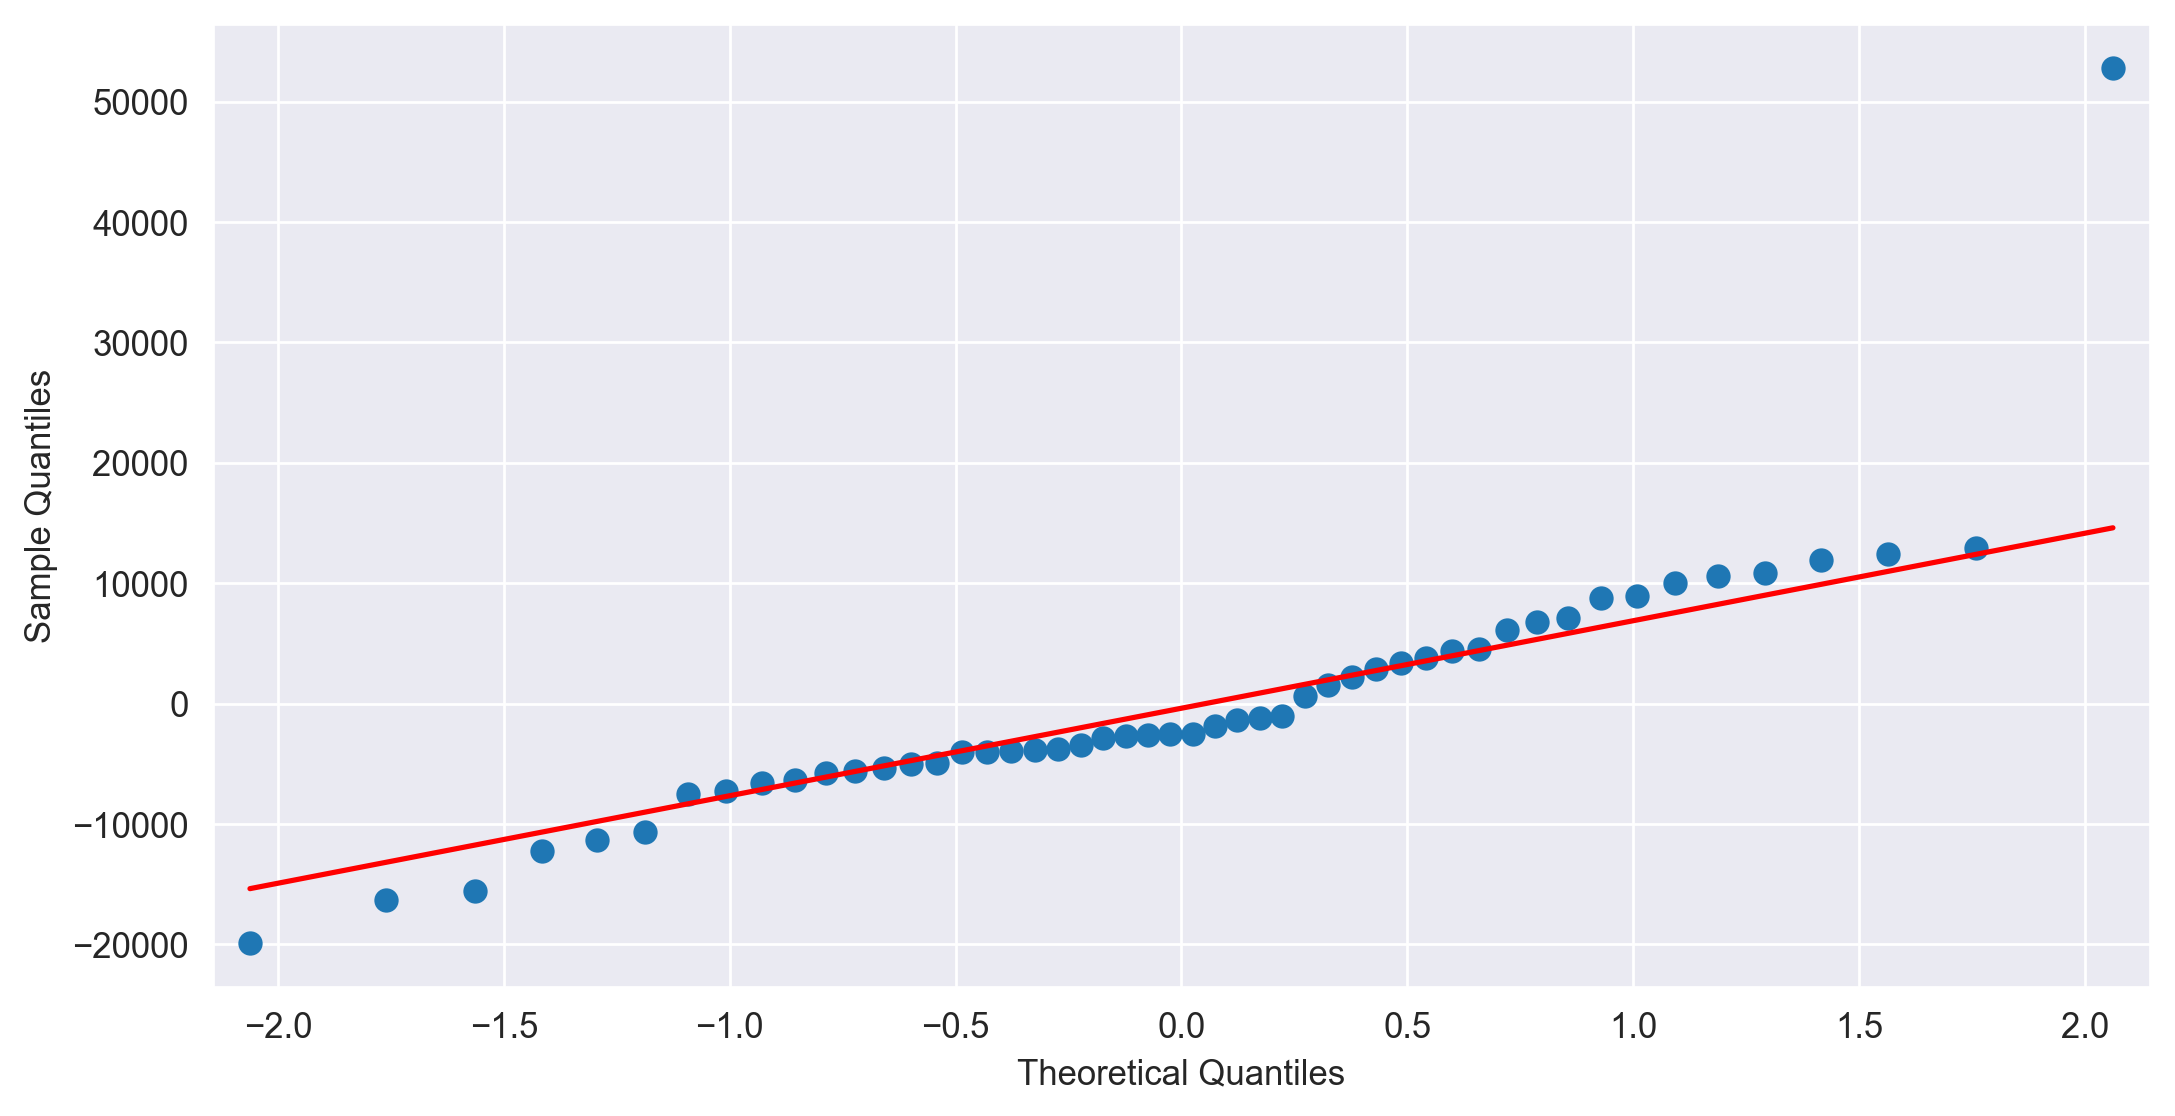

In [82]:
sm.qqplot(model.resid, line = 'q');

# get index for higher residuals

In [84]:
np.argmax(model.resid), np.max(model.resid)

(49, 52787.146372604635)

#  Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [85]:
model.params

Intercept    55940.407171
RnD              0.747248
admin           -0.014937
market           0.022094
dtype: float64

In [86]:
model.fittedvalues

0     187876.002847
1     184987.555560
2     178101.351002
3     170516.194441
4     168854.827375
5     161011.270188
6     157154.561362
7     158287.343850
8     150678.903059
9     153217.053278
10    135505.866418
11    135314.090982
12    129698.048453
13    128239.997511
14    148896.764485
15    145470.076076
16    118259.684793
17    130748.924726
18    129310.273815
19    118224.262905
20    117818.791421
21    118842.235189
22    116100.204874
23    111557.898861
24    115134.259100
25    105224.587435
26    113038.459609
27    115715.980803
28    105179.413479
29    105045.204563
30    102551.746204
31    101292.587108
32    102410.565778
33    100610.903671
34     92934.051237
35     93594.631649
36     79905.178020
37     92458.737061
38     74165.103986
39     87380.093611
40     79474.024388
41     79151.812547
42     75439.178305
43     66409.380184
44     70826.322744
45     54875.382974
46     61757.871359
47     53917.496449
48     55572.550636
49     55191.043627


In [87]:
model.resid

0      4385.827153
1      6804.504440
2     12949.038998
3     12385.795559
4     -2666.887375
5     -4020.150188
6     -1032.051362
7     -2534.743850
8      1532.866941
9     -3457.093278
10    10616.083582
11     8945.309018
12    11887.471547
13     6067.352489
14   -16294.114485
15   -15553.036076
16     8733.245207
17    -5378.554726
18    -5043.373815
19     4552.597095
20      655.238579
21    -7529.215189
22    -5747.954874
23    -2823.908861
24    -6582.219100
25     2179.752565
26    -7304.919609
27   -10707.670803
28    -1897.033479
29    -4040.564563
30    -2614.156204
31    -3809.027108
32    -4982.725778
33    -3831.983671
34     3778.748763
35     2884.878351
36    10803.011980
37    -2509.597061
38     7063.956014
39    -6374.333611
40    -1234.114388
41    -1352.982547
42    -3940.688305
43     3349.599816
44    -5625.992744
45    10050.697026
46   -12267.121359
47   -11357.766449
48   -19899.140636
49    52787.146373
dtype: float64

Text(0, 0.5, 'Errors')

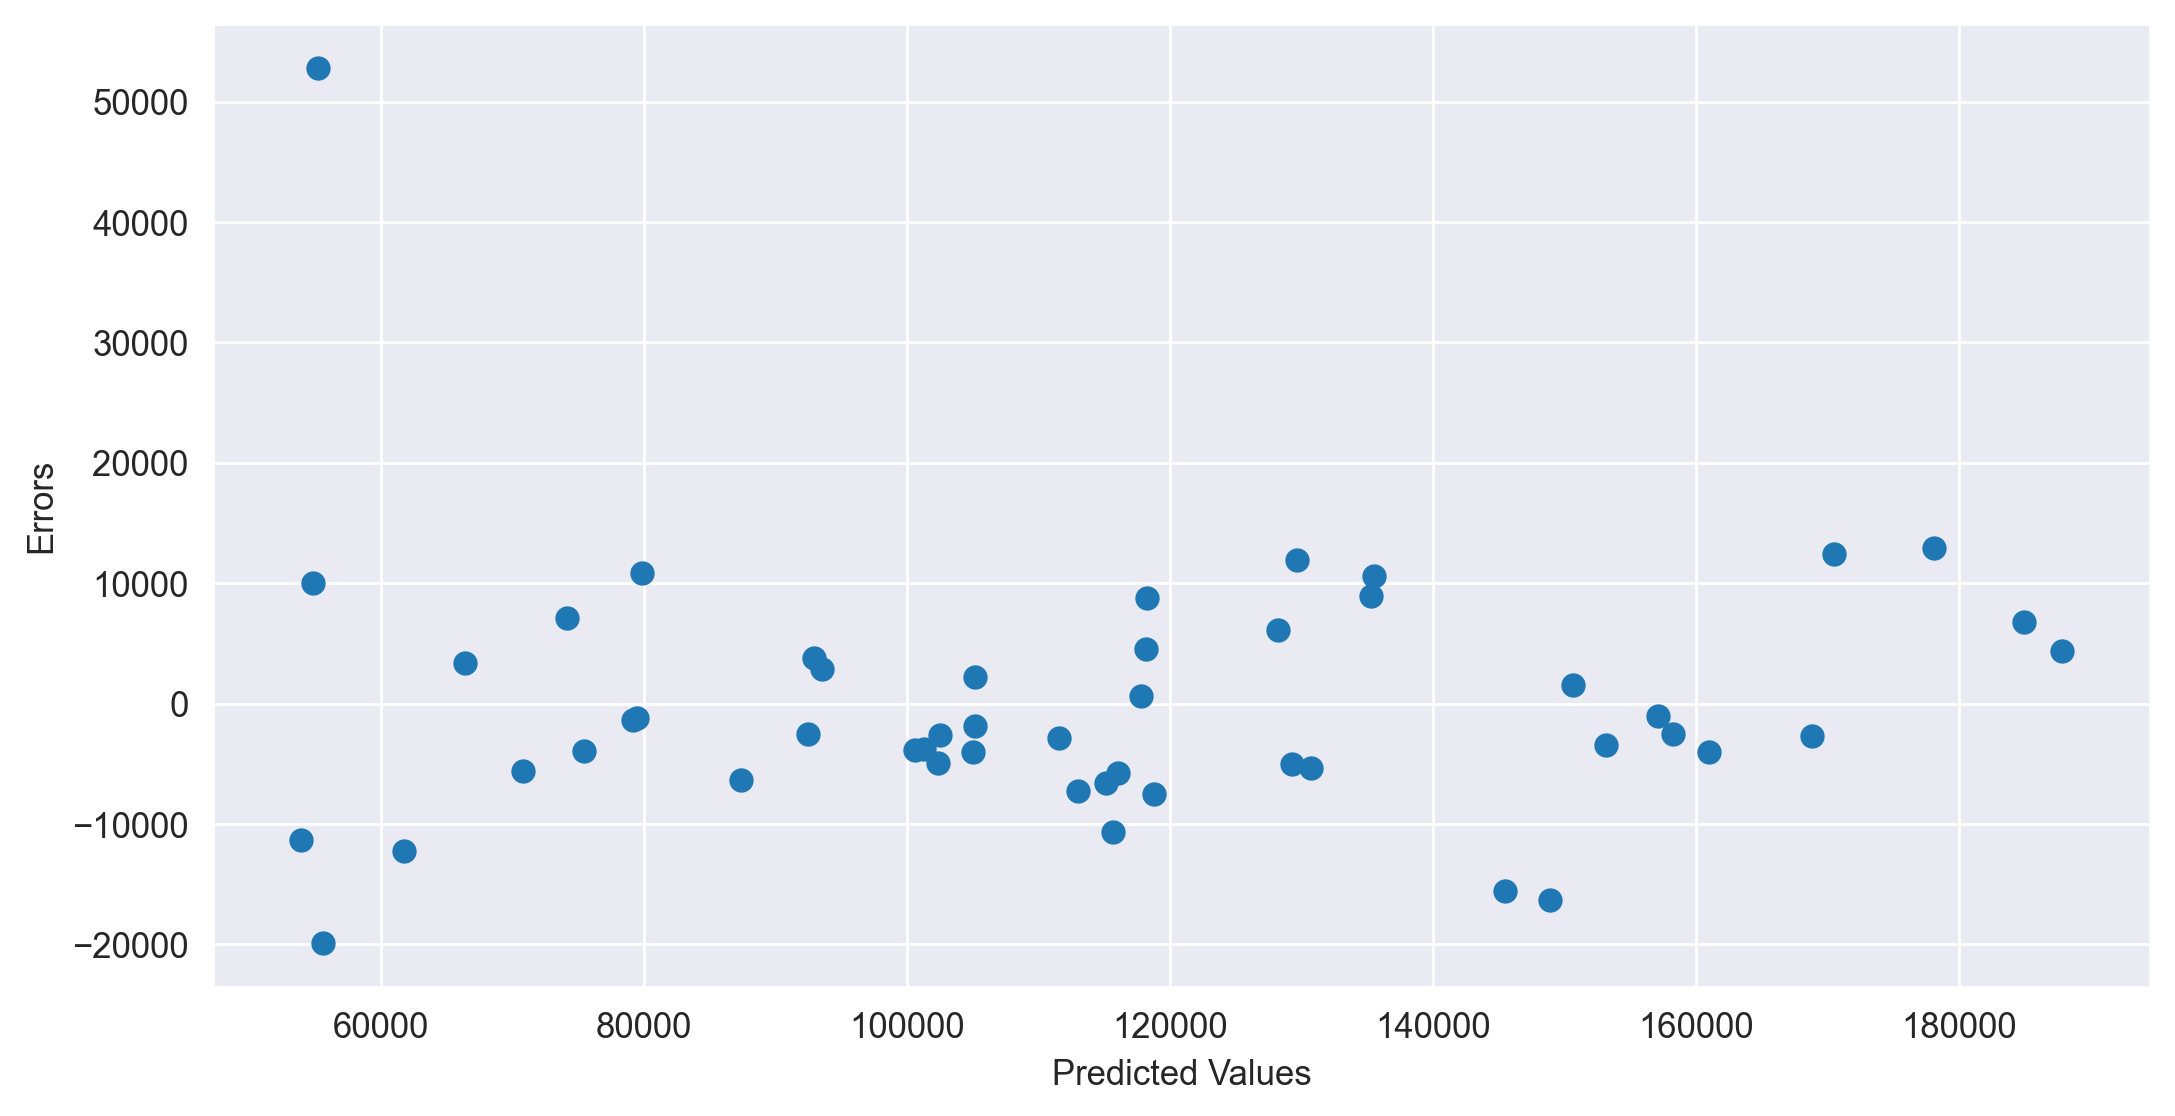

In [88]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

# Residual VS Regressor

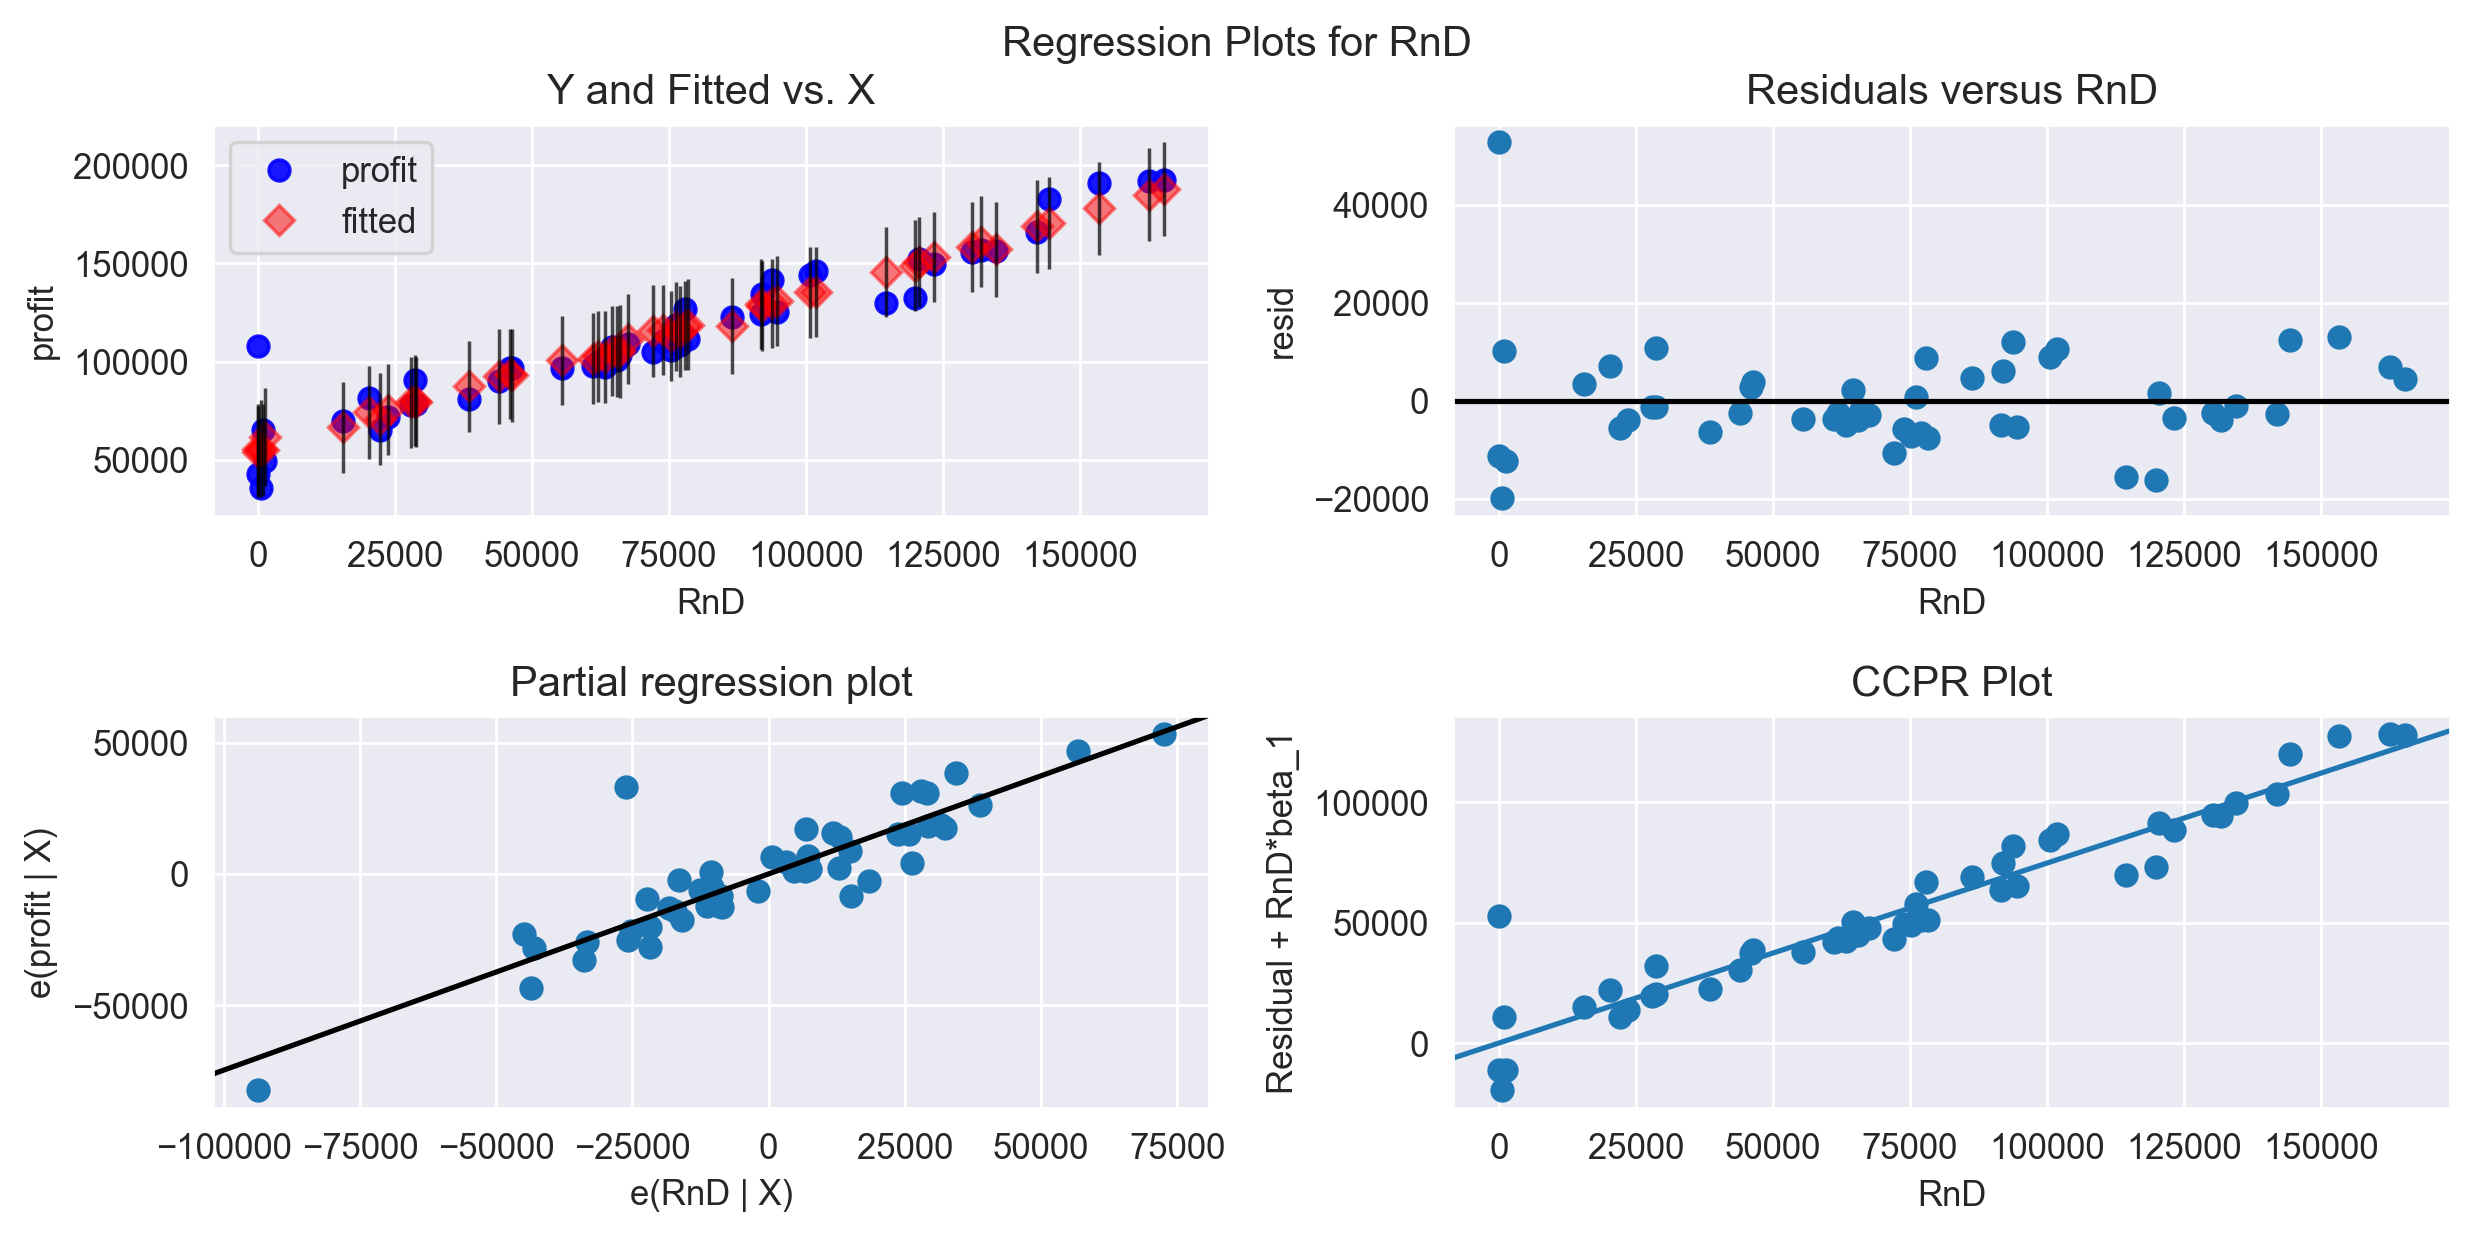

In [89]:
sm.graphics.plot_regress_exog(model,'RnD');

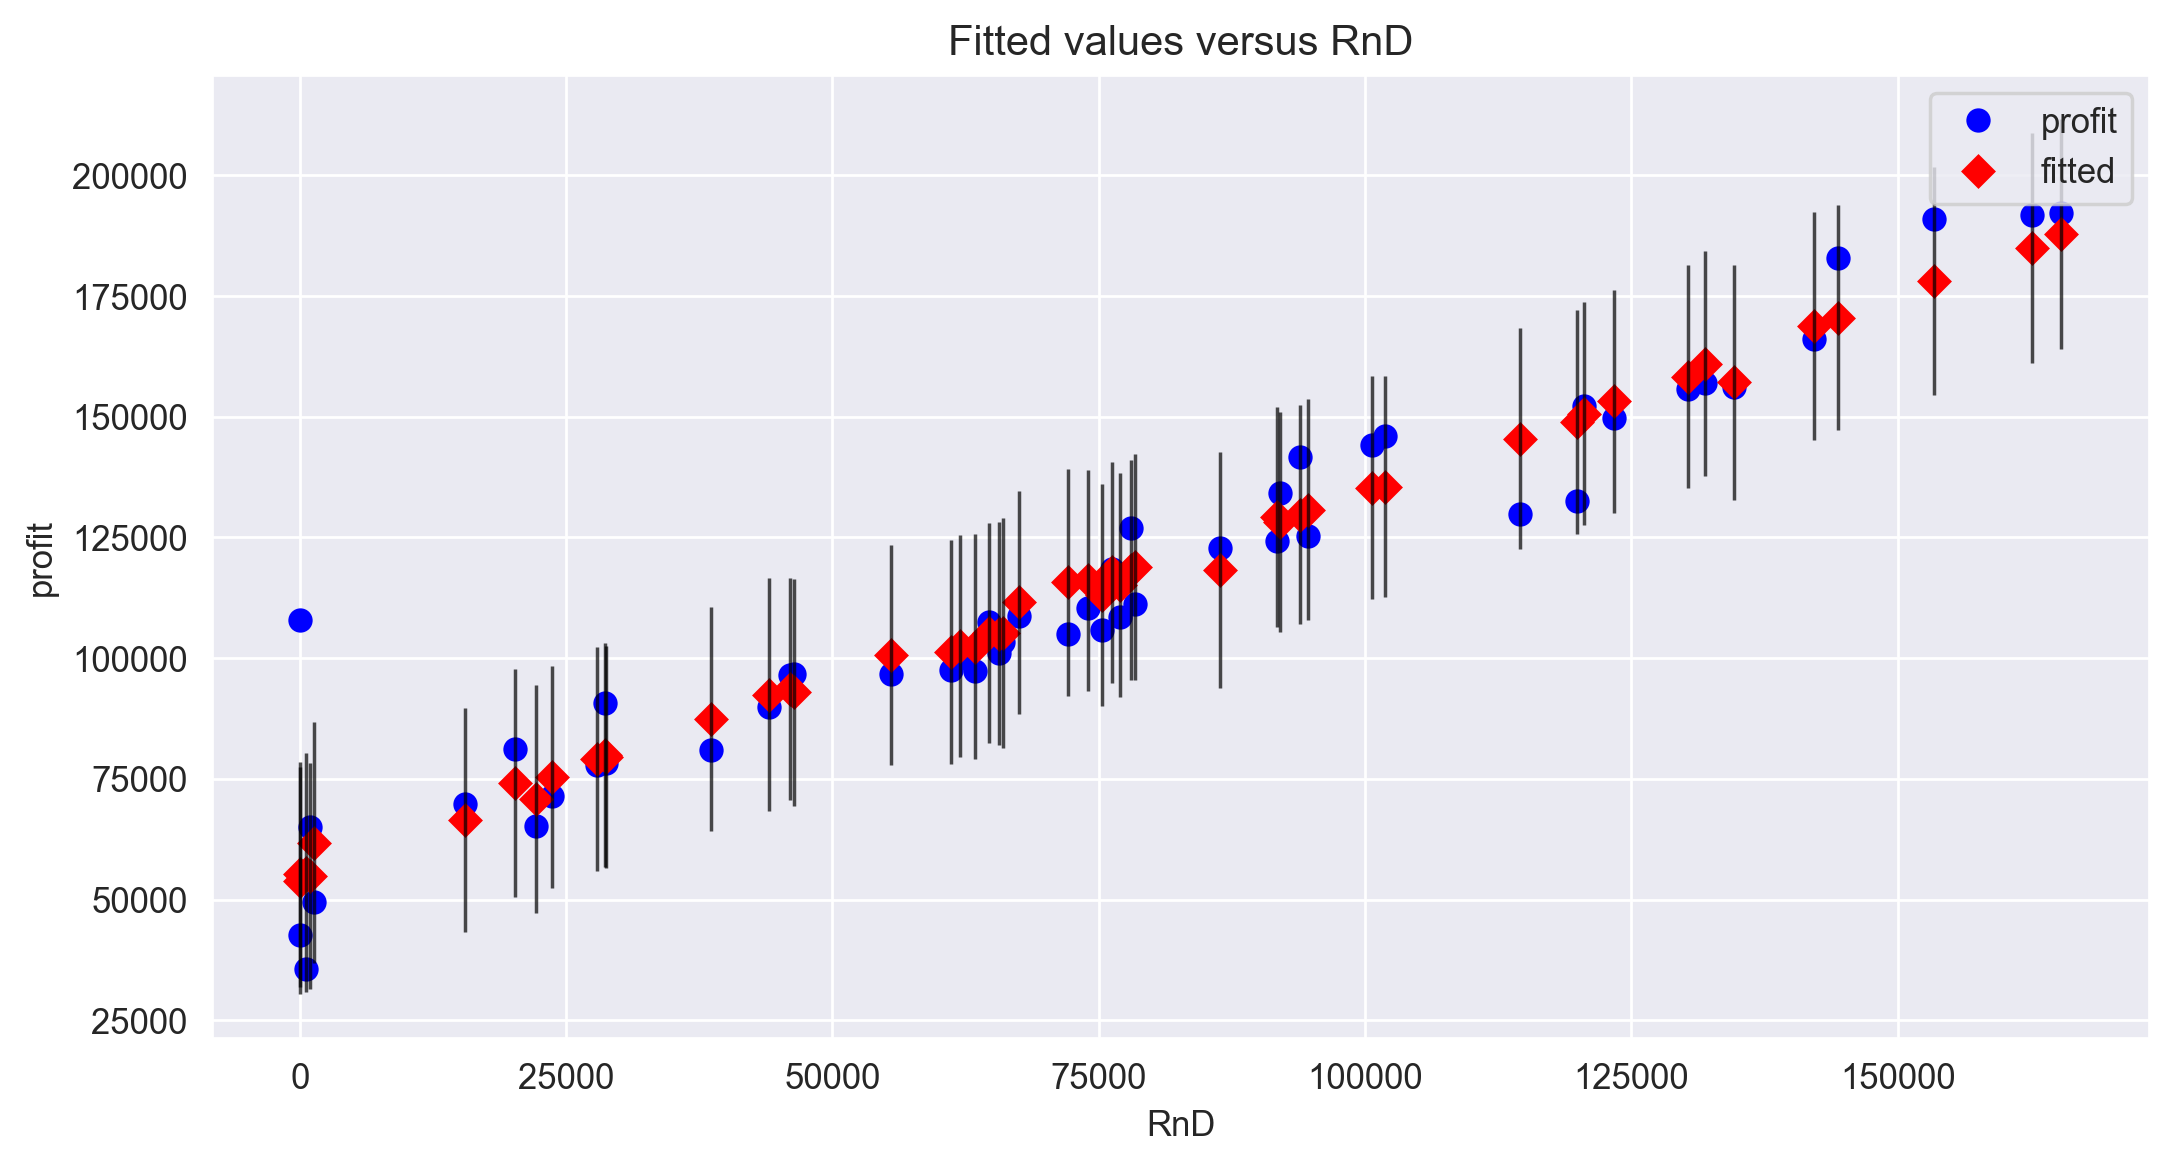

In [90]:
sm.graphics.plot_fit(model,'RnD');

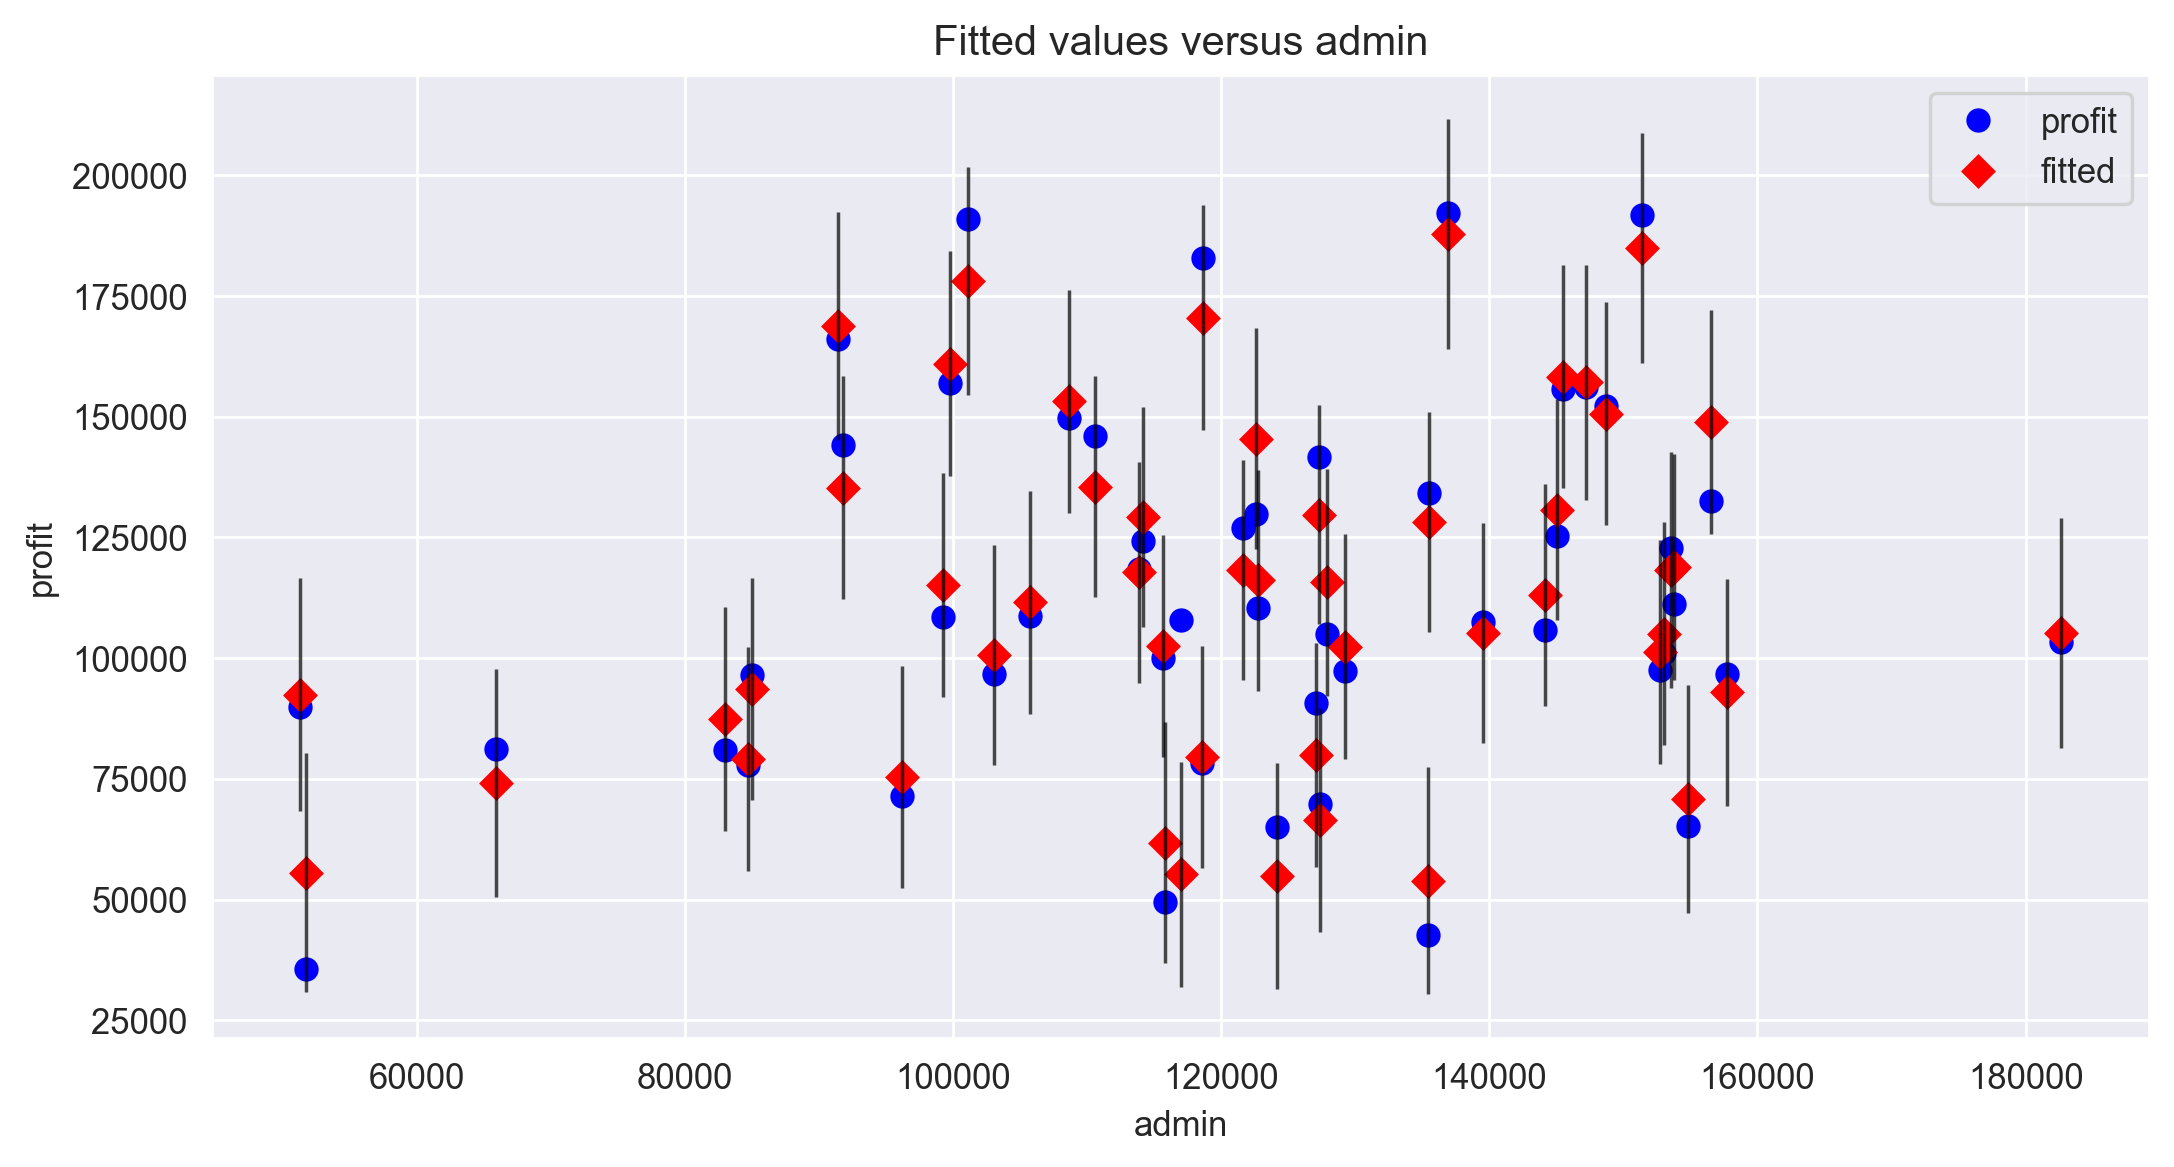

In [91]:
sm.graphics.plot_fit(model,'admin');

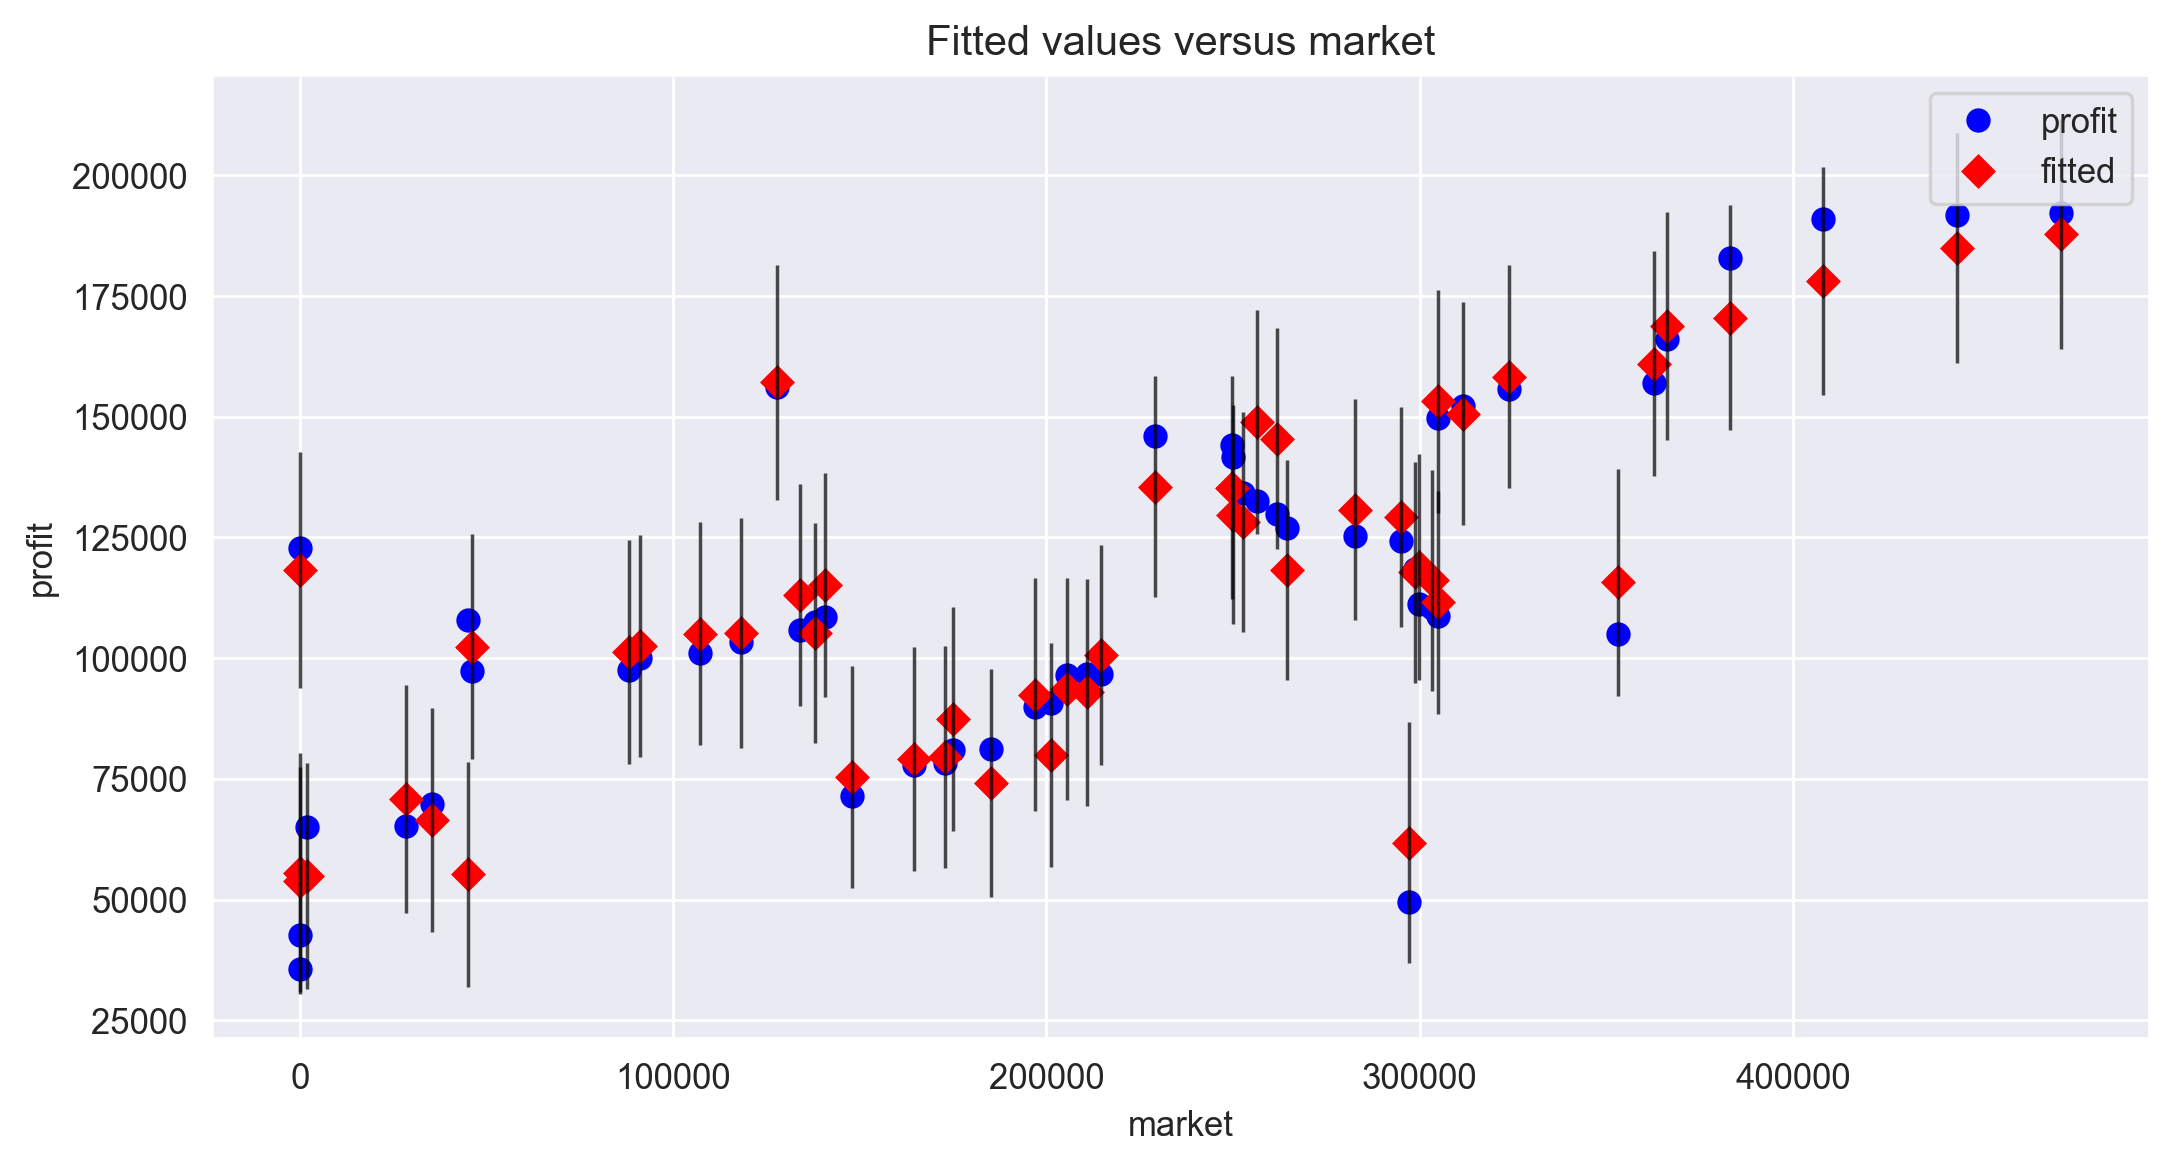

In [92]:
sm.graphics.plot_fit(model,'market');

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [93]:
model

In [94]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [95]:
c

array([6.30824868e-03, 1.49785531e-02, 4.69816086e-02, 2.69679575e-02,
       1.99441500e-03, 2.99043518e-03, 5.37330627e-04, 8.62069404e-04,
       2.94844840e-04, 1.51913577e-03, 1.03662858e-02, 1.18980249e-02,
       7.22543249e-03, 2.17929357e-03, 3.88636390e-02, 2.11830490e-02,
       4.29319715e-03, 2.82021221e-03, 1.67820212e-03, 1.13550388e-02,
       3.72015301e-05, 1.18371277e-02, 3.48613187e-03, 9.46915834e-04,
       6.47849779e-03, 3.66297314e-04, 5.28294058e-03, 2.65553614e-02,
       1.23391739e-03, 2.25839420e-03, 8.33093947e-04, 2.21102101e-03,
       4.87354082e-03, 9.99658719e-04, 3.48935319e-03, 1.07292381e-03,
       1.86874001e-02, 2.60438175e-03, 1.44511775e-02, 5.79701879e-03,
       1.64694227e-04, 2.76288239e-04, 1.87976681e-03, 1.71909303e-03,
       7.70659380e-03, 2.09670462e-02, 1.26288497e-01, 3.05676056e-02,
       2.83982120e-01, 4.89566129e-01])

Text(0, 0.5, 'Cooks Distance')

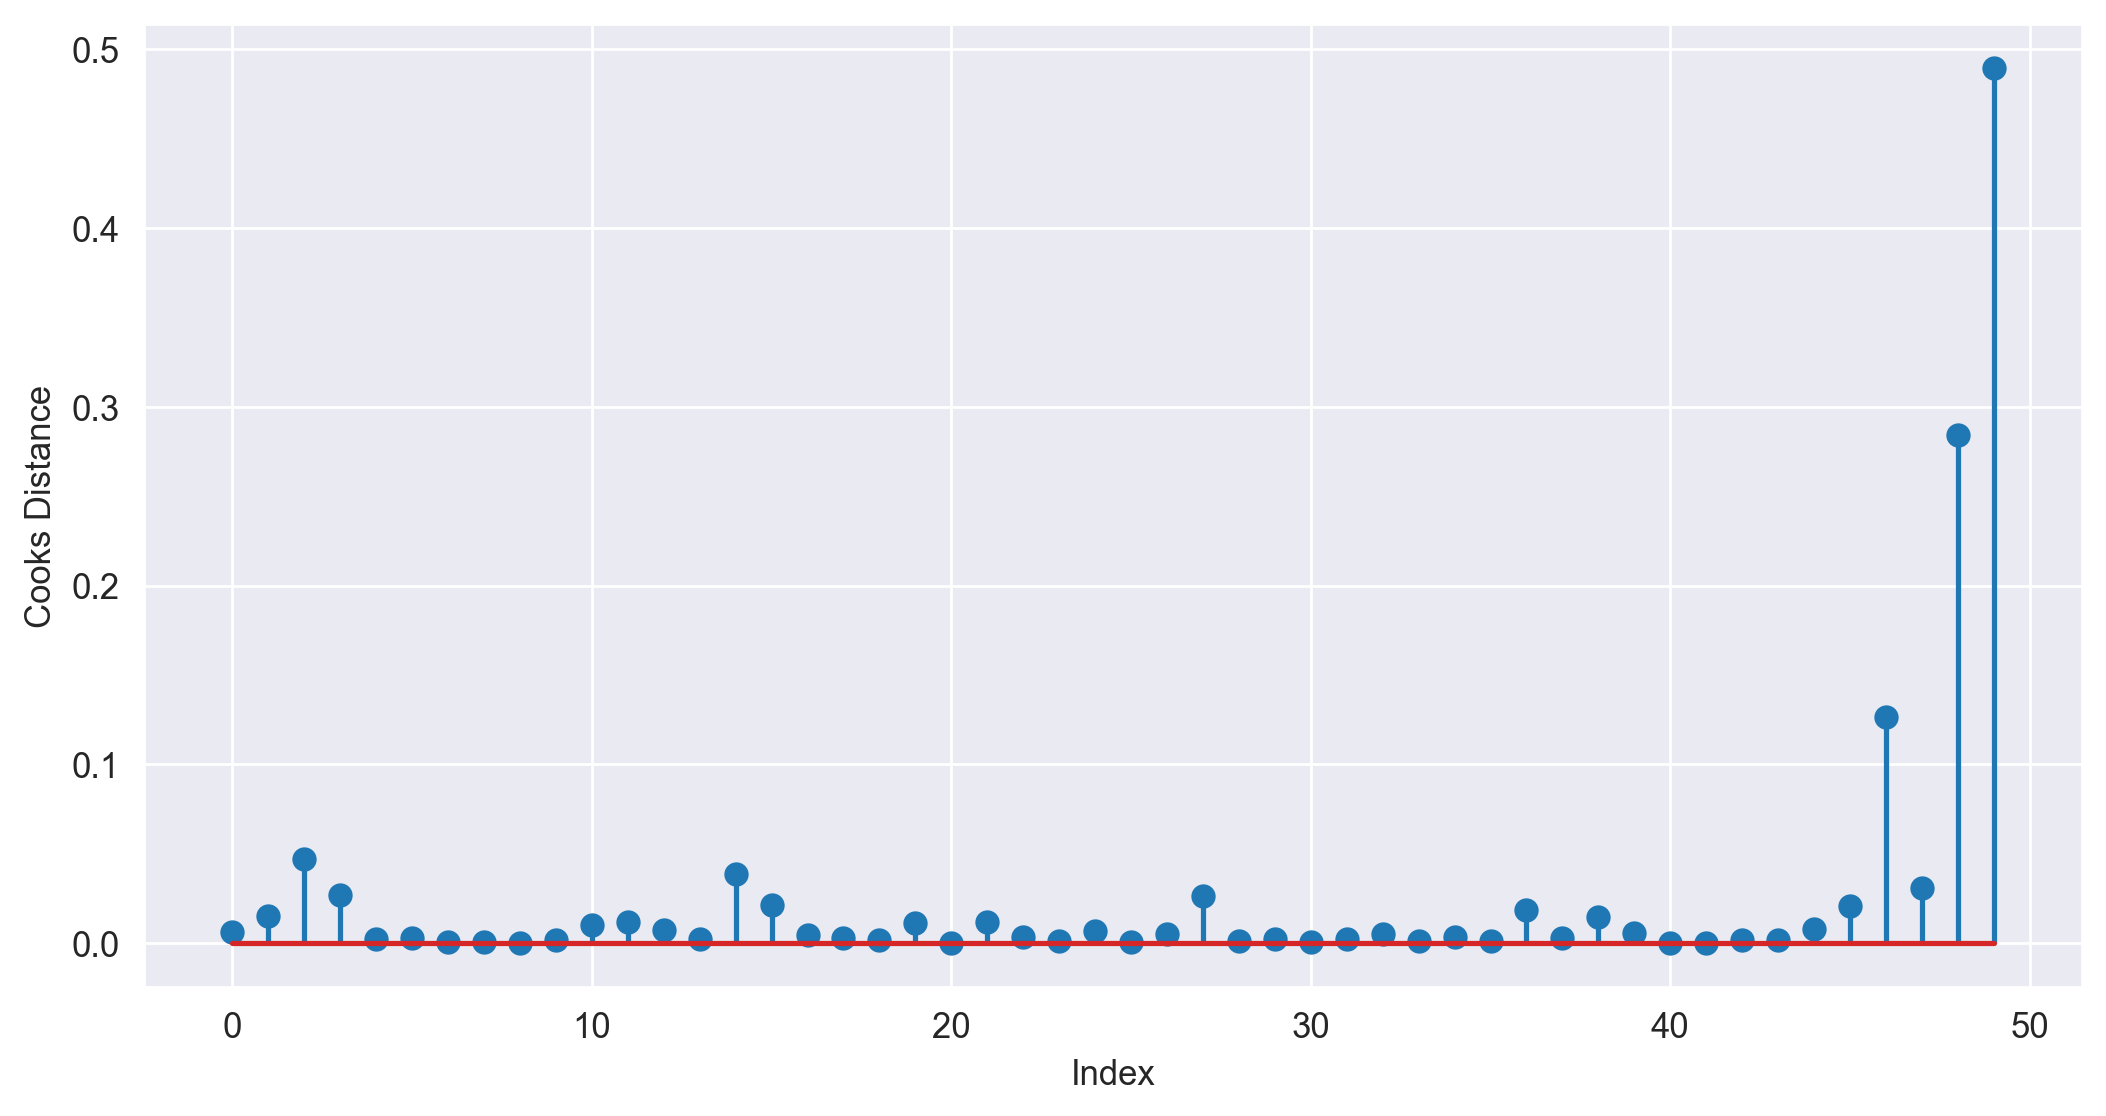

In [96]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [97]:
np.argmax(c), np.max(c)

(49, 0.48956612860716486)

In [98]:
df.iloc[[49]]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Influence Plot


In [99]:
from statsmodels.graphics.regressionplots import influence_plot 

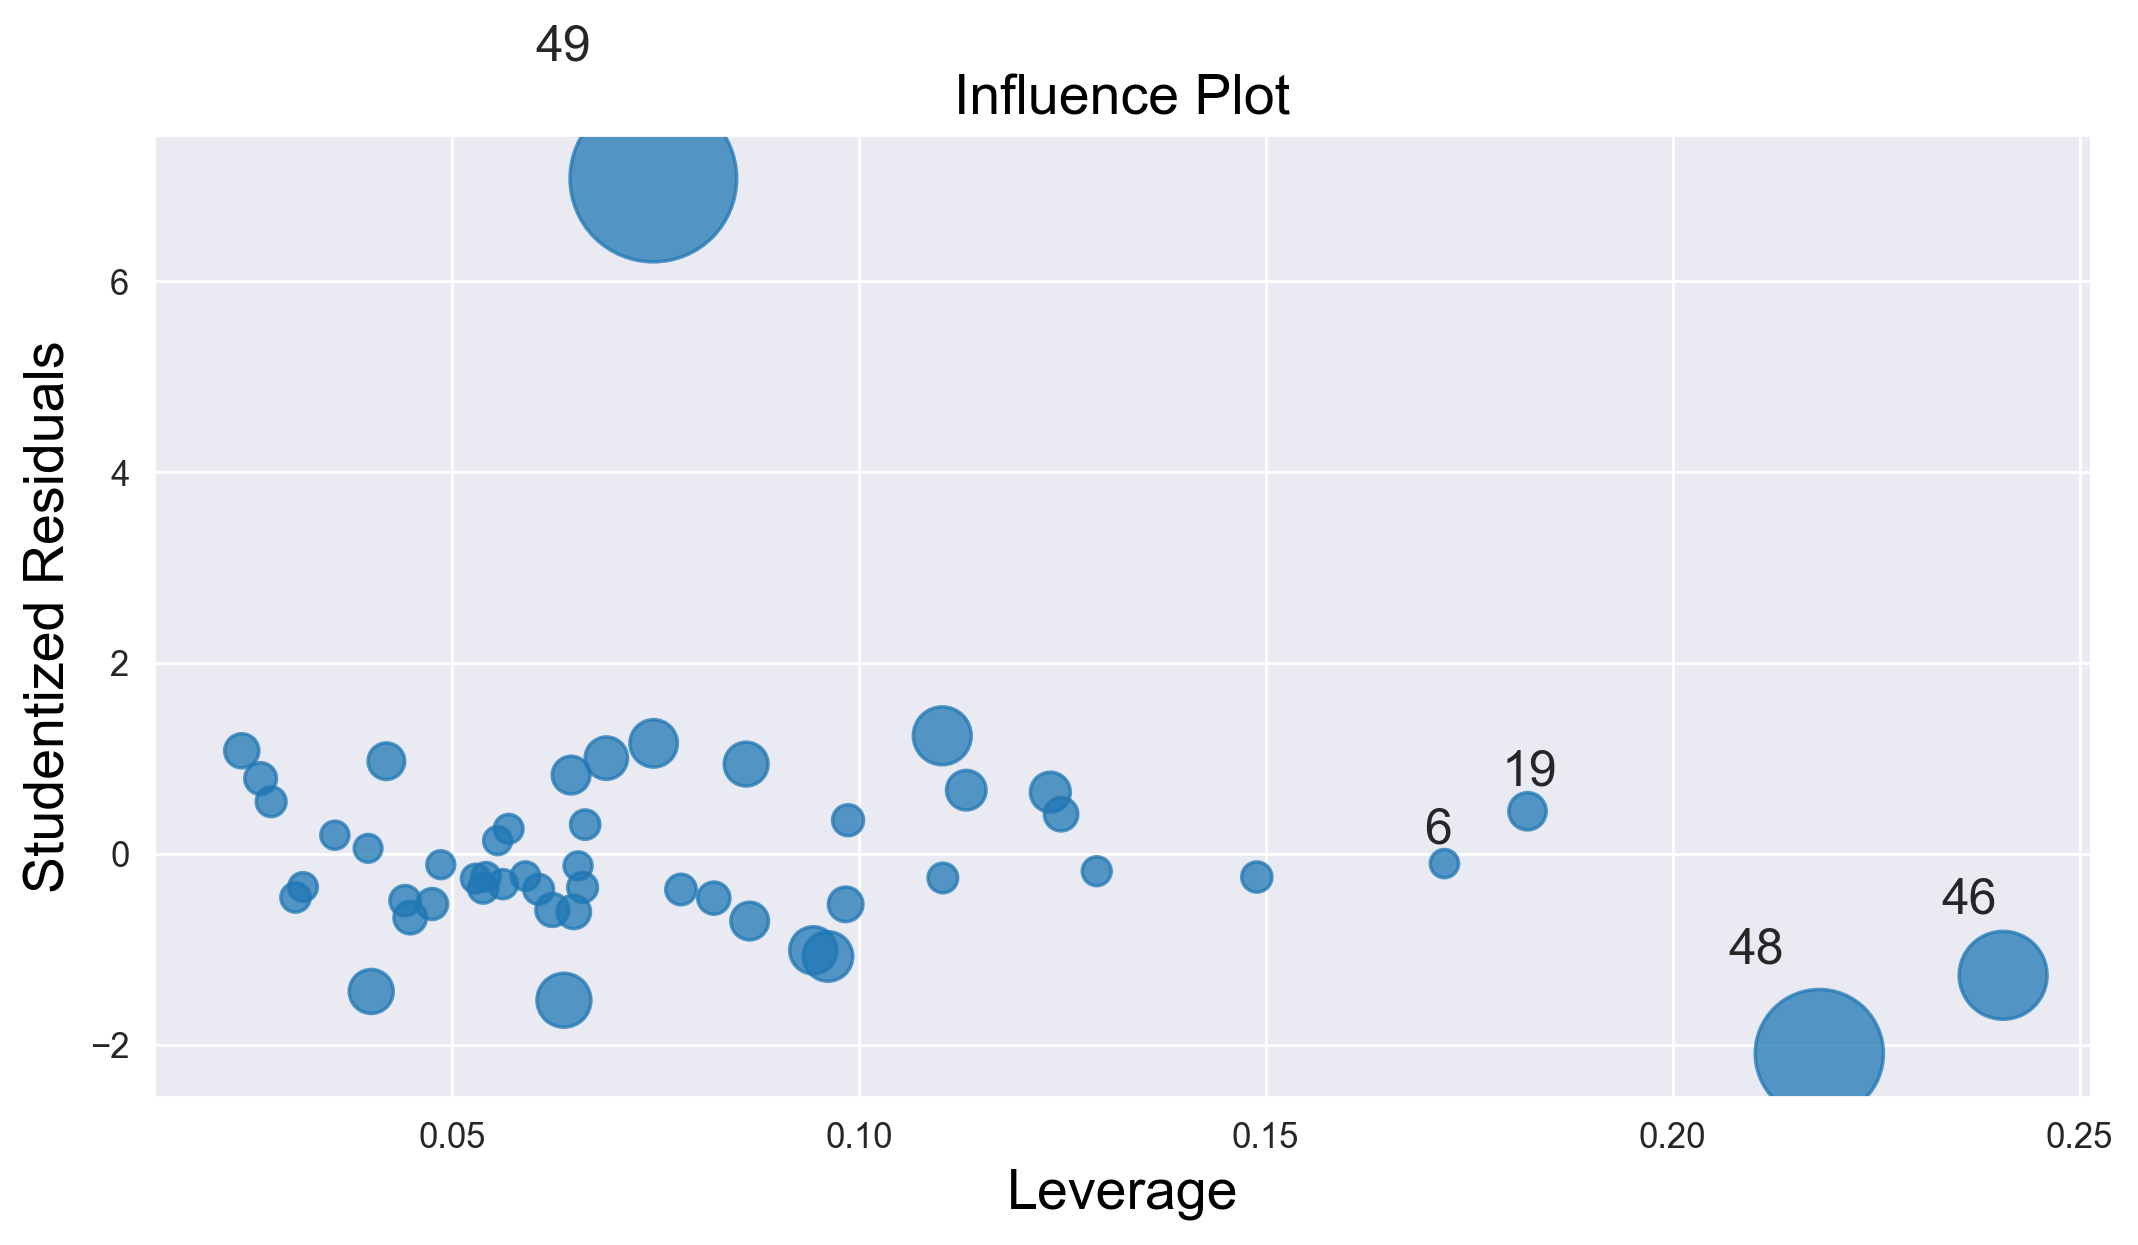

In [100]:
influence_plot(model);

In [101]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.36

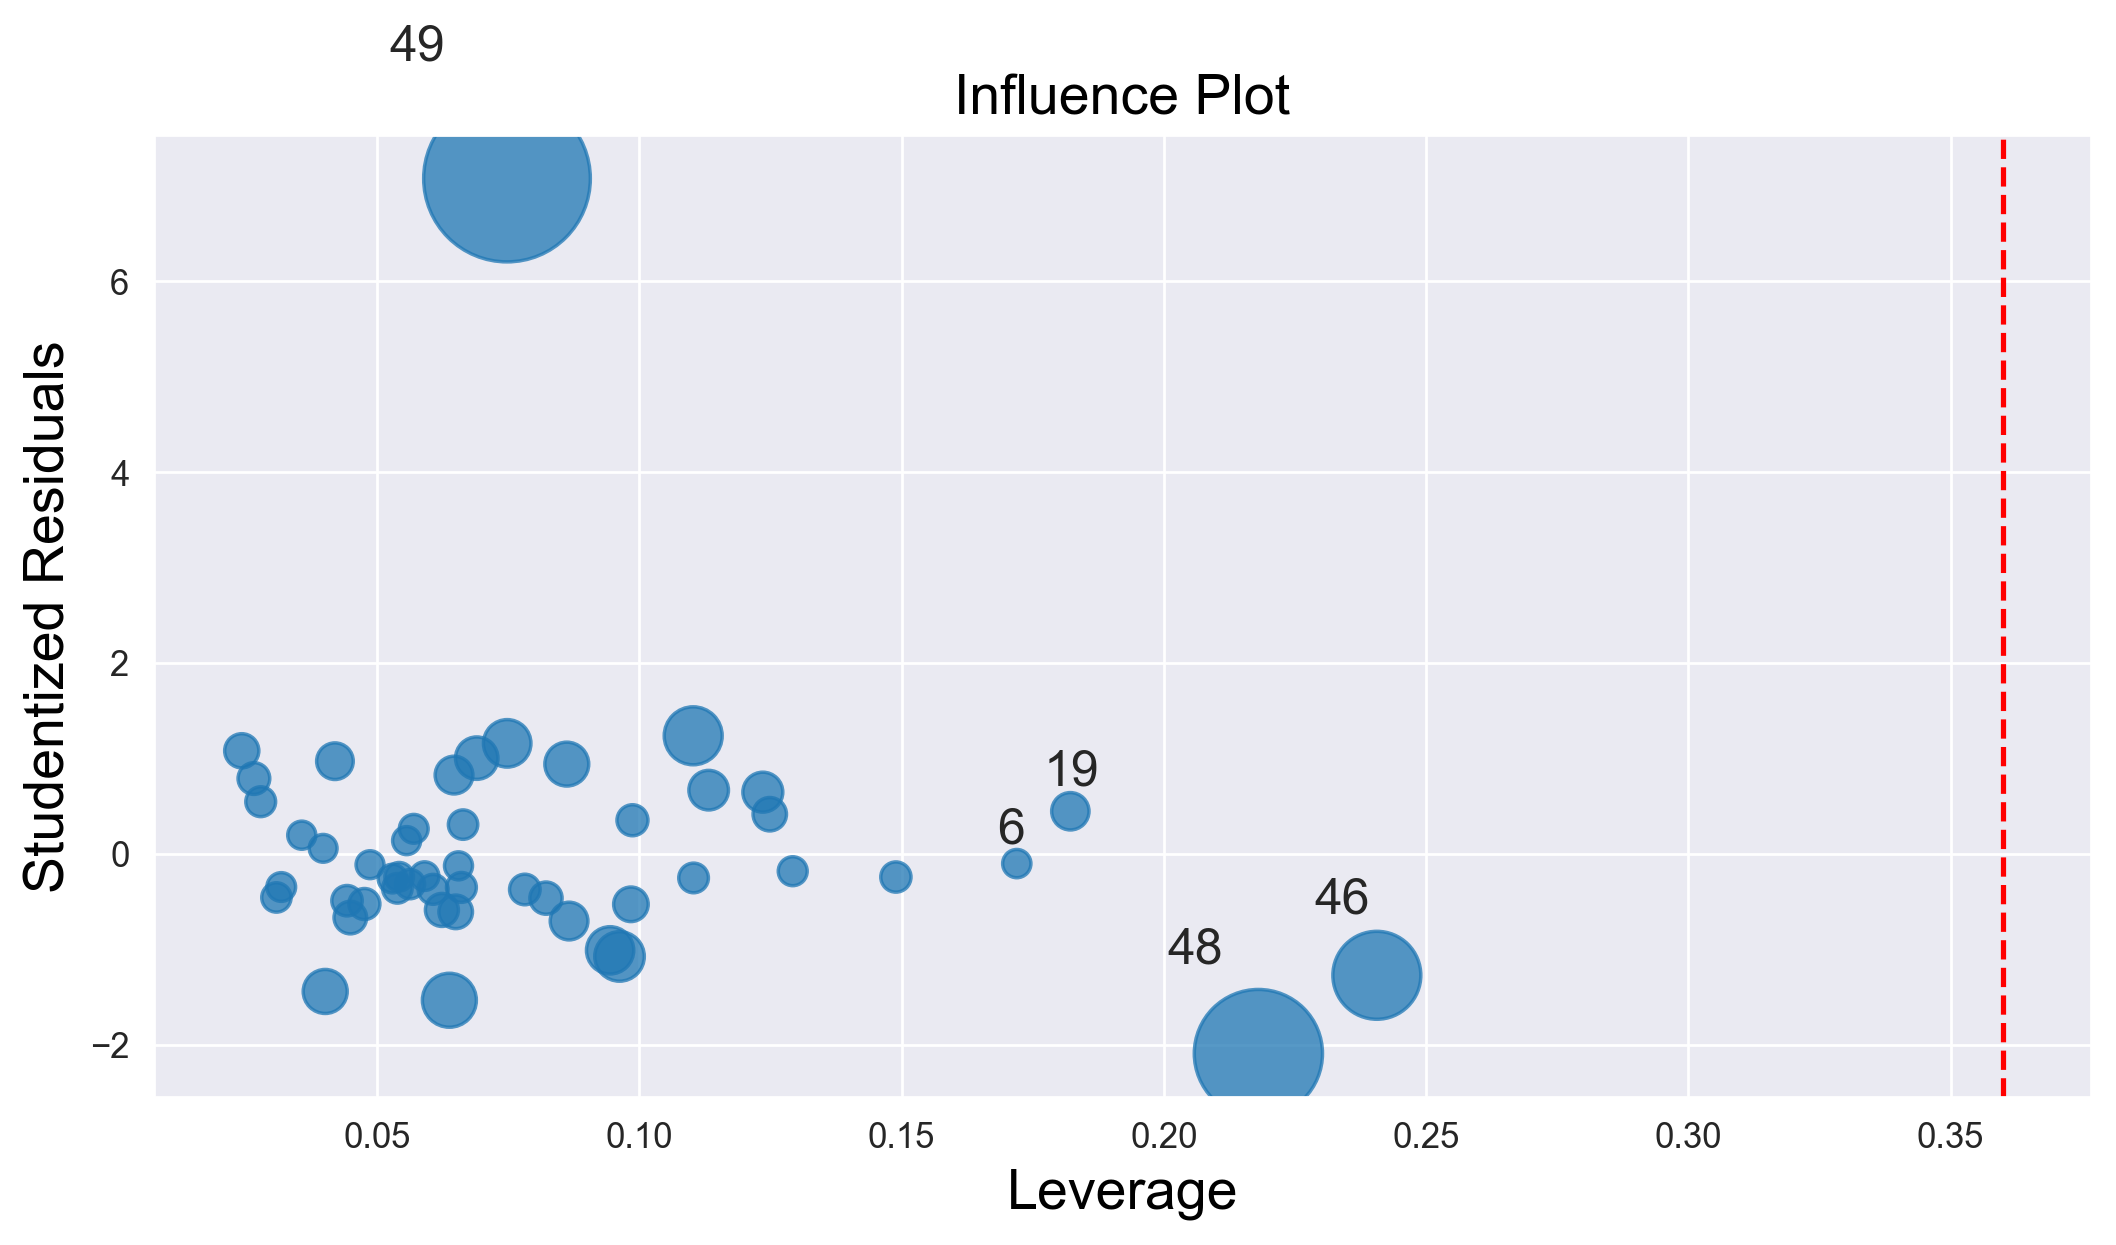

In [102]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Since the value is <1 , we doesn't need to do the diagnostic process and finalize the model# 

In [109]:
final_model = smf.ols("profit~RnD+market+admin", data=data).fit()

In [110]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           5.06e-25
Time:                        14:39:09   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RnD            0.7472      0.055     13.707      0.000       0.638       0.857
market         0.0221      0.020      1.112      0.272      -0.018       0.062
admin         -0.0149      0.062     -0.242      0.810      -0.139       0.109
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting values for final_model

In [114]:
predicted = pd.DataFrame()
predicted['RnD'] = data.RnD
predicted['market'] = data.market
predicted["admin"] = data.admin
predicted['profit'] = data.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD', 'market', 'admin']]))                                                                  
predicted

,RnD,market,admin,profit,Predicted_Profit
0,165349.20,471784.10,136897.80,192261.83,187876.002847
1,162597.70,443898.53,151377.59,191792.06,184987.555560
2,153441.51,407934.54,101145.55,191050.39,178101.351002
3,144372.41,383199.62,118671.85,182901.99,170516.194441
4,142107.34,366168.42,91391.77,166187.94,168854.827375
5,131876.90,362861.36,99814.71,156991.12,161011.270188
6,134615.46,127716.82,147198.87,156122.51,157154.561362
7,130298.13,323876.68,145530.06,155752.60,158287.343850
8,120542.52,311613.29,148718.95,152211.77,150678.903059
9,123334.88,304981.62,108679.17,149759.96,153217.053278
